In [1]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
font_title = {'family':'serif','color':'black','size':18}
font_axes = {'family':'serif','color':'black','size':16}
font_ticks = {'family':'serif','color':'black','size':16}

In [3]:
runs_all = [342]
runs_all = [343,344,345]

def sturge(data):
    return int( np.ceil( 1 + 3.3 * np.log10( len( data ) ) ) )

def gauss(x, amp, center, sigma):
    return np.absolute(amp) * np.e ** (-0.5 * (((x - center)/sigma) ** 2))

def exp(x,a):
    return 1 - np.e**(-a*x)

def exp_2(x, S, a):
    return S * (1 - np.e**(-a*x))

def horiz_asy(x, asy):
    return (x**0)*asy

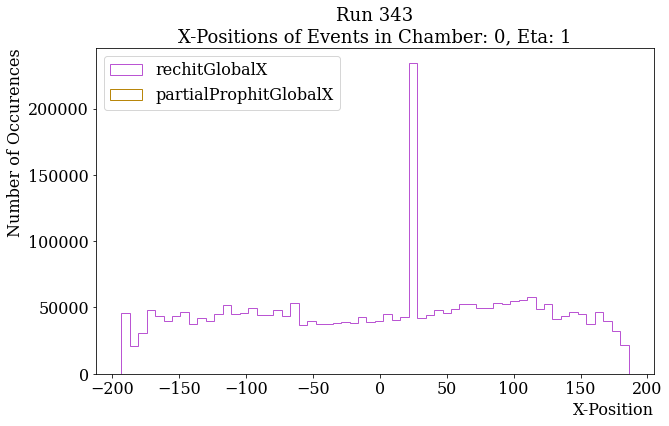

60


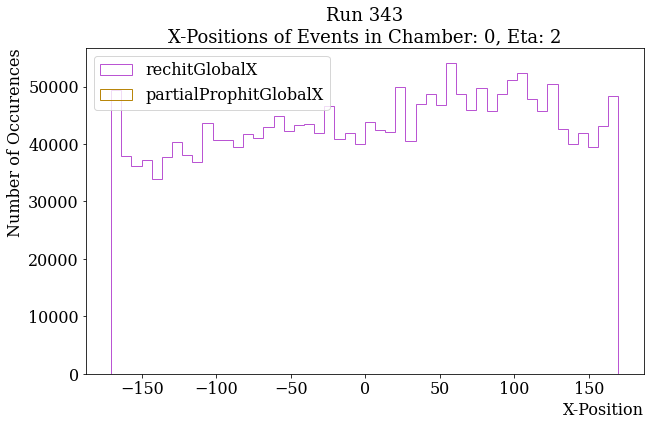

50


/tmp/ipykernel_547/1877172369.py:5: RuntimeWarning: divide by zero encountered in log10
  return int( np.ceil( 1 + 3.3 * np.log10( len( data ) ) ) )


OverflowError: cannot convert float infinity to integer

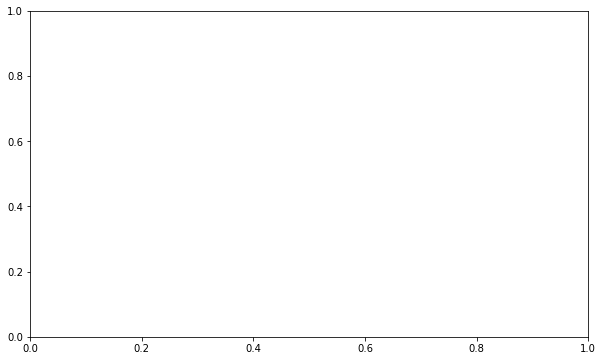

In [8]:
for run in runs_all:
    
    t = uproot.open("/eos/user/n/nkurth/00000"+str(run)+".root")['trackTree']
    
    chamber_rechit = ak.Array(t["rechitChamber"].array())
    eta_rechit = ak.Array(t["rechitEta"].array())
    
    chamber_prop = ak.Array(t["partialTrackChamber"].array())
    eta_prop = ak.Array(t["partialProphitEta"].array())
    
    for ch in [0,1,2,3]:
        
        for et in [1,2,3,4]:
            
            cut1 = chamber_rechit==ch
            cut2 = eta_rechit==et
            cut_sum = np.logical_and(cut1, cut2)
            
            rechit = ak.Array(t['rechitGlobalX'].array())[cut_sum]
            rechit = ak.flatten(rechit)
            
            cut1 = chamber_prop==ch
            cut2 = eta_prop==et
            cut_sum = np.logical_and(cut1,cut2)
            prop_data = ak.Array(t['partialProphitGlobalX'].array())[cut_sum]
            prop_data = ak.flatten(prop_data)
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            num_bins_rechit = sturge(rechit)
            num_bins_prop = sturge(prop_data)
            num = 0
            if num_bins_rechit > num_bins_prop:
                num = num_bins_rechit
            else:
                num = num_bins_prop
            
            num = round( (num*0.2) +1 ) * 10
            temp = [min(rechit),min(prop_data),max(rechit),max(prop_data)]
            plt.hist(rechit, bins = num, histtype = 'step', label = 'rechitGlobalX', range = (min(temp),max(temp)), color='mediumorchid' )
            plt.hist(prop_data,bins = num, histtype = 'step', label = 'partialProphitGlobalX', range = (min(temp),max(temp)), color = 'darkgoldenrod')
            ax.set_title("Run "+str(run)+"\nX-Positions of Events in Chamber: " + str(ch) + ", Eta: " + str(et), fontdict = font_title)   
            plt.xlabel("X-Position", loc = 'right',fontdict=font_axes)
            plt.ylabel("Number of Occurences", loc = 'top',fontdict=font_axes)
            plt.xticks(fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.legend(prop = {'family':'serif','size':16}, loc = 'upper left')
            plt.savefig("Run_"+str(run)+"_Chamber_"+str(ch)+"_Eta_"+str(et)+"_rechitGlobalX_partialProphitGlobalX_hist.png")
            plt.show()
            plt.close()
            
            print(num)

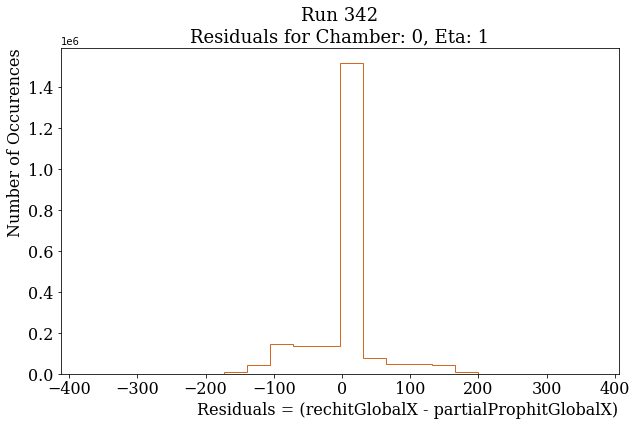

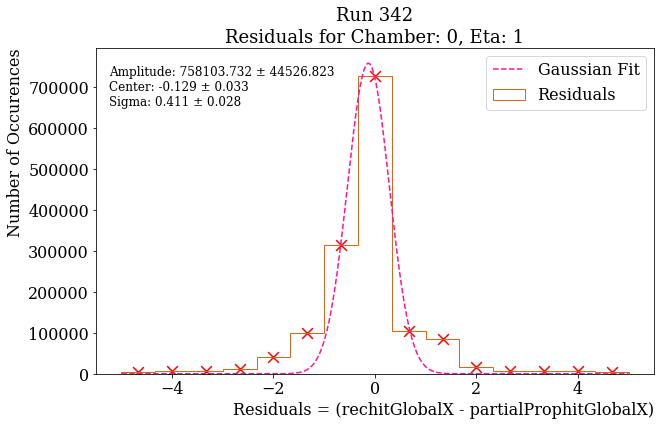

[0.98197209 0.73103339]


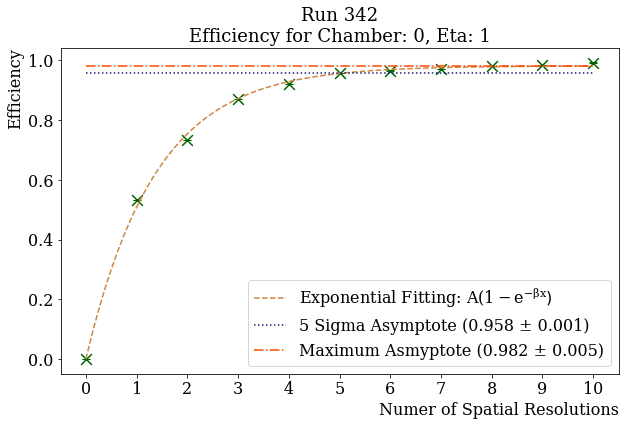

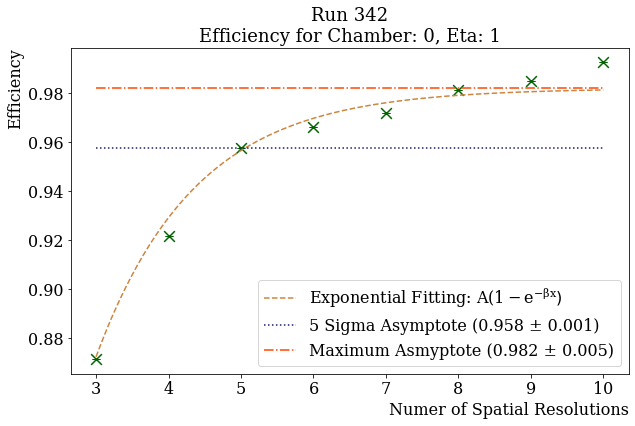

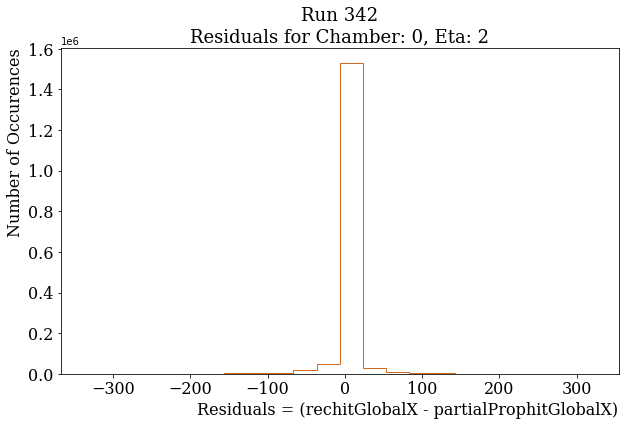

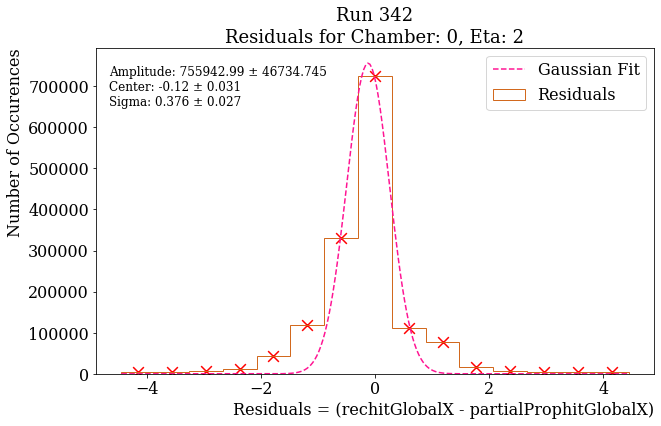

[0.9880351  0.71632566]


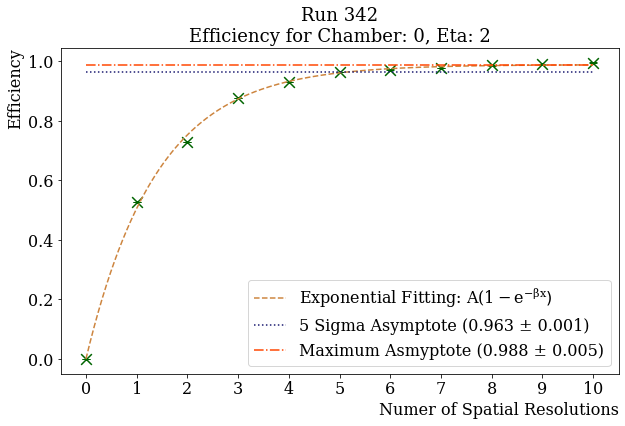

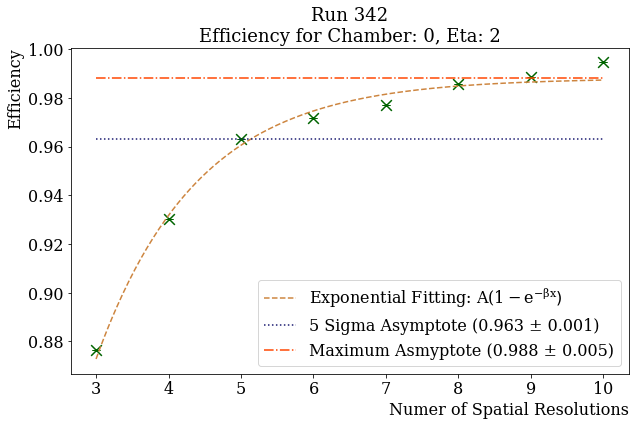

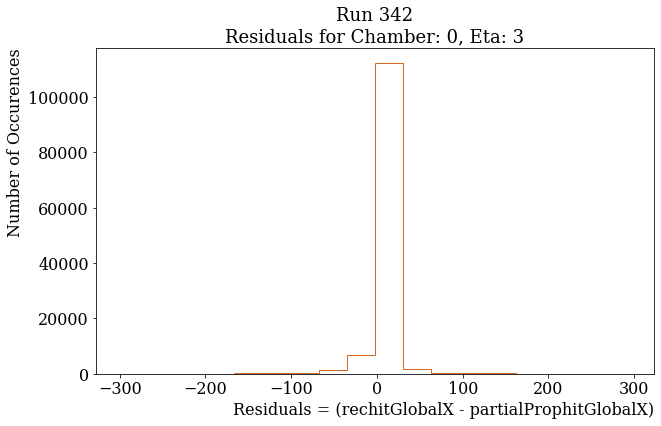

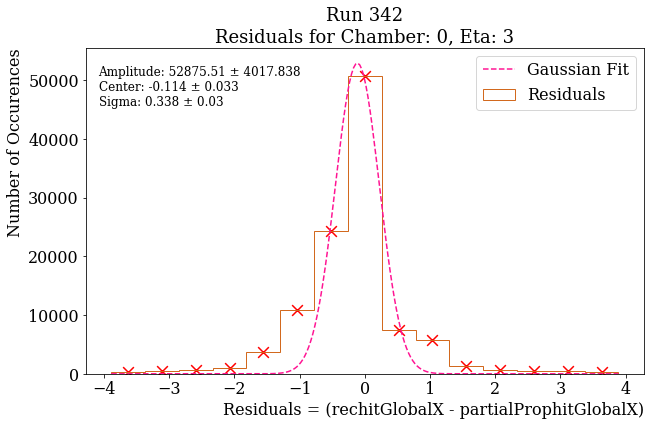

[0.98924393 0.66311405]


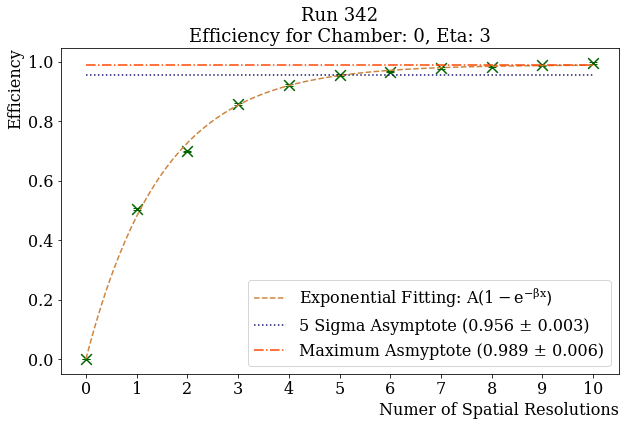

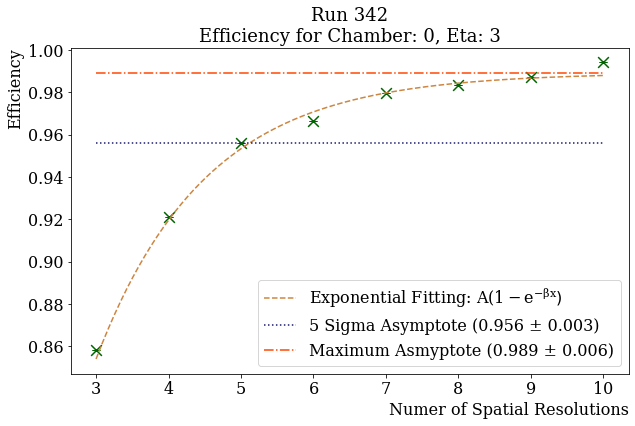

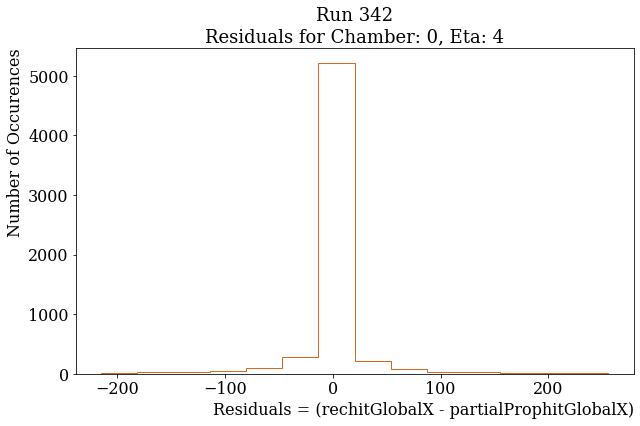

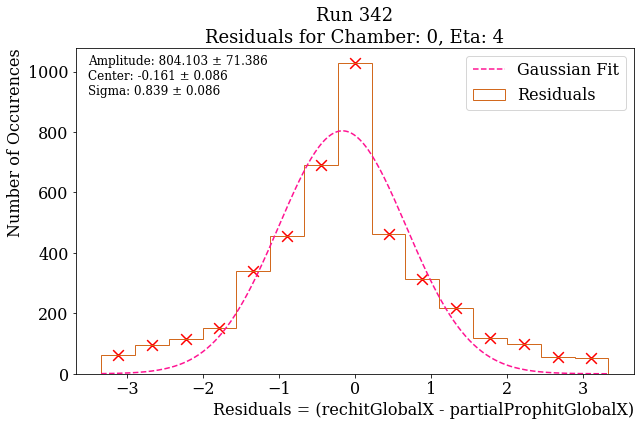

[1.         0.96219566]


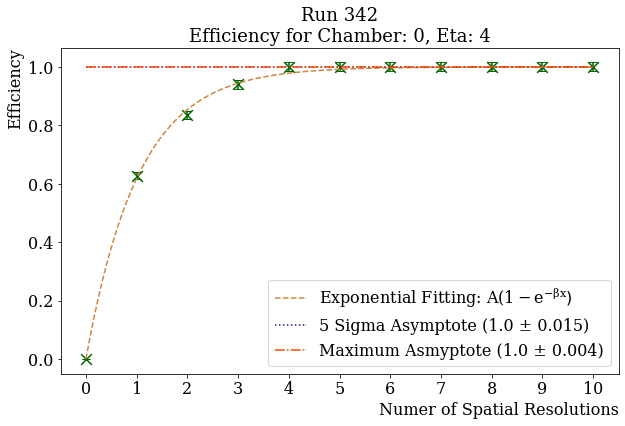

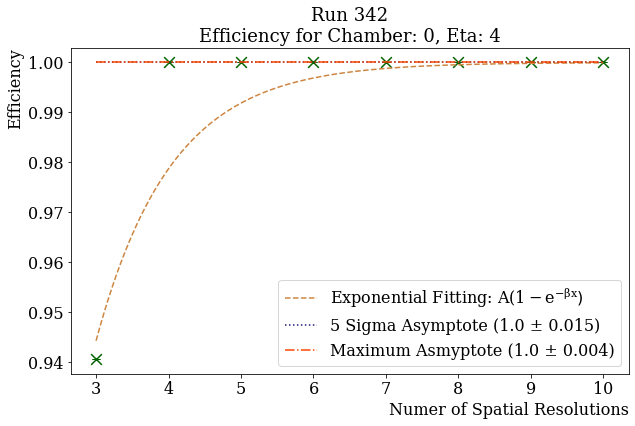

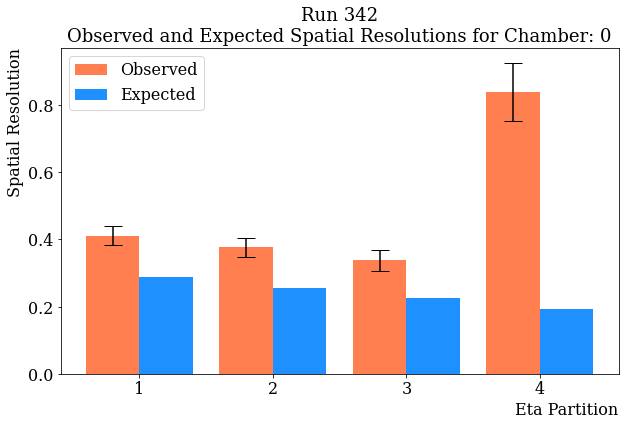

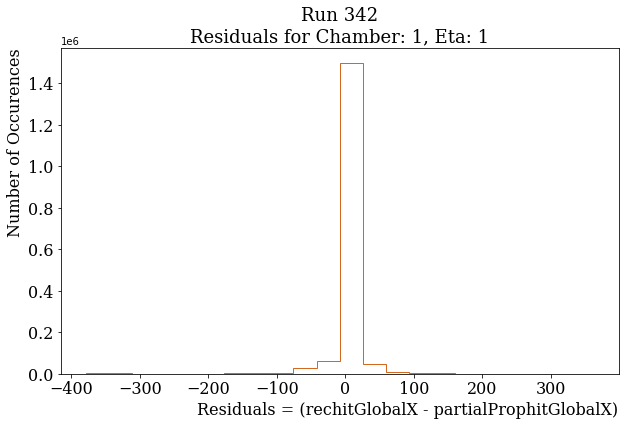

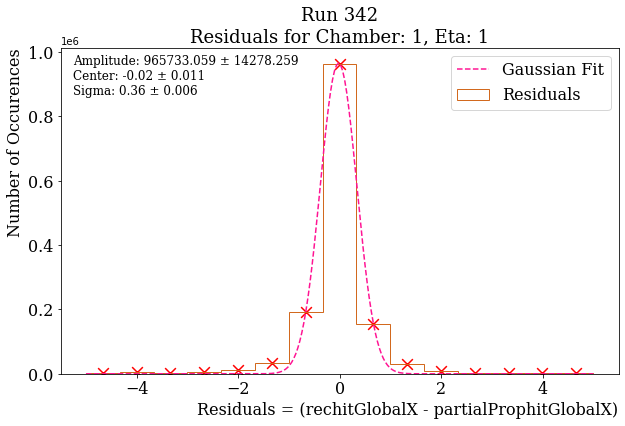

[0.97780148 1.10207896]


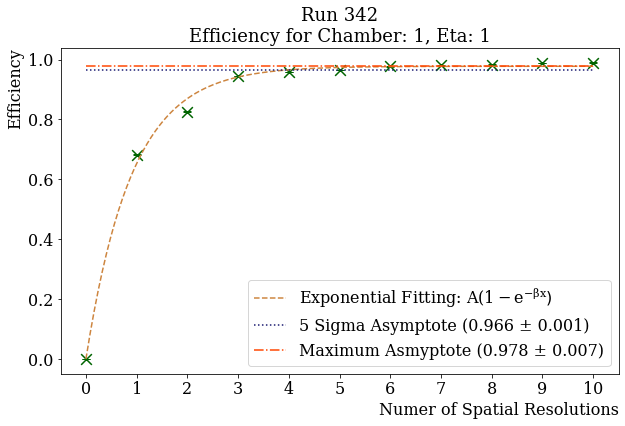

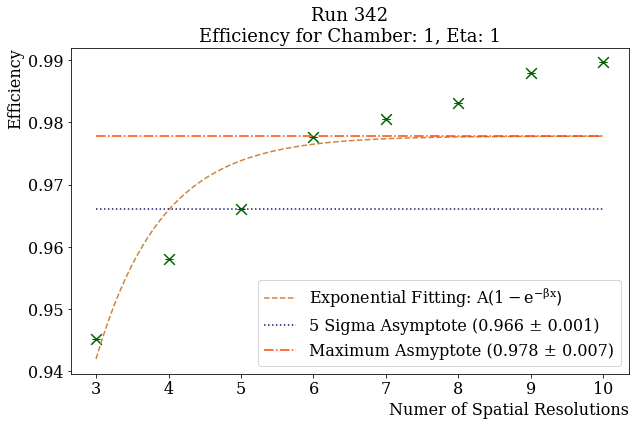

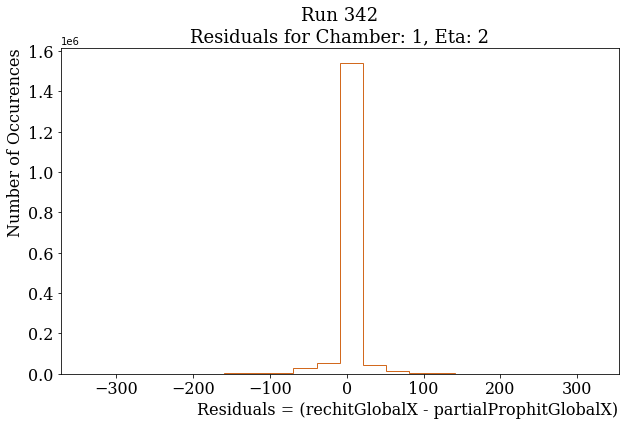

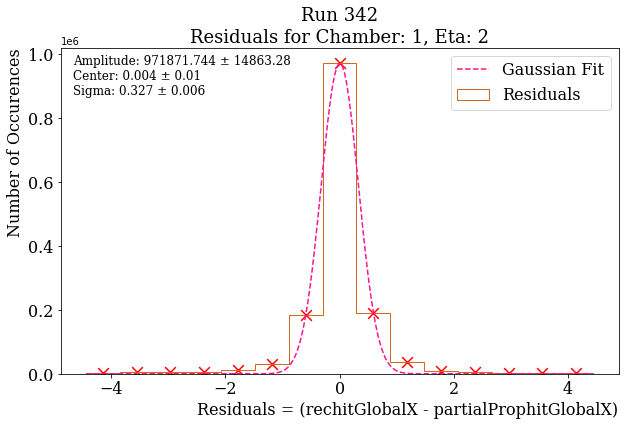

[0.97889903 1.08715484]


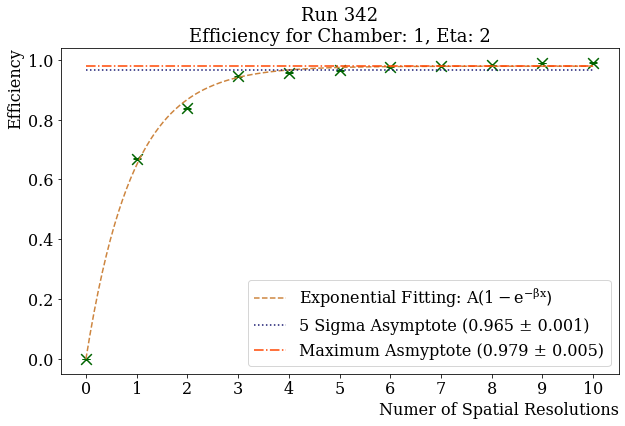

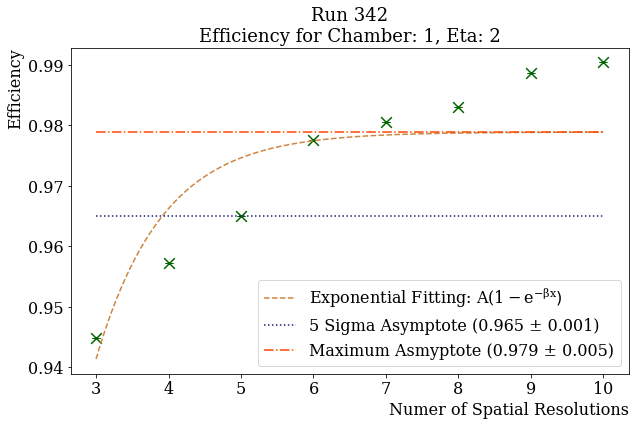

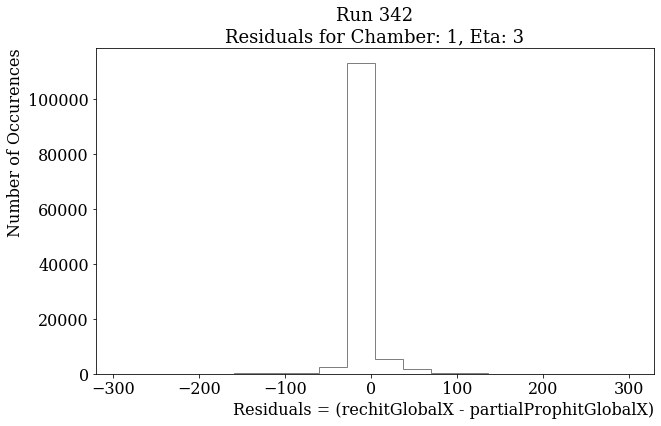

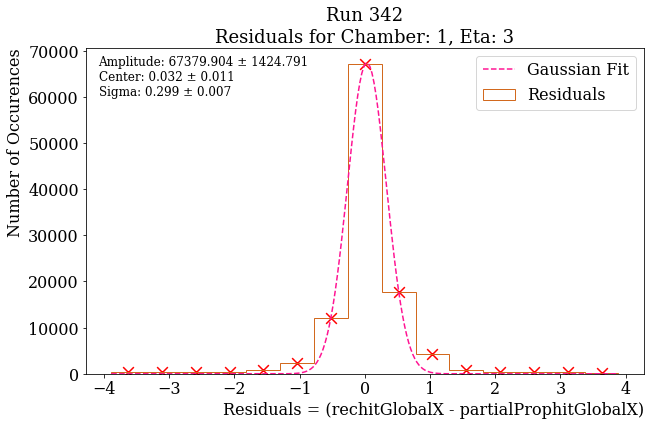

[0.98174108 1.01013346]


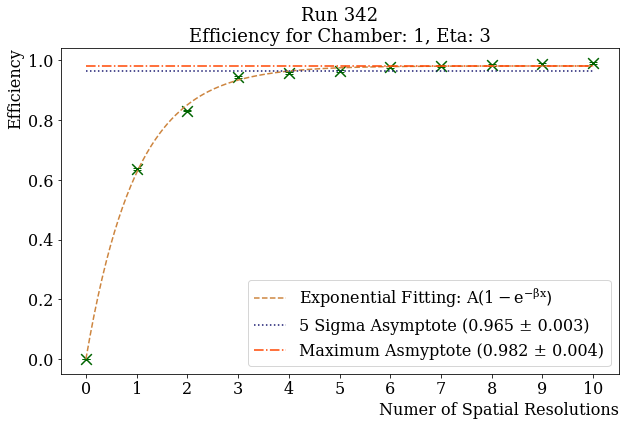

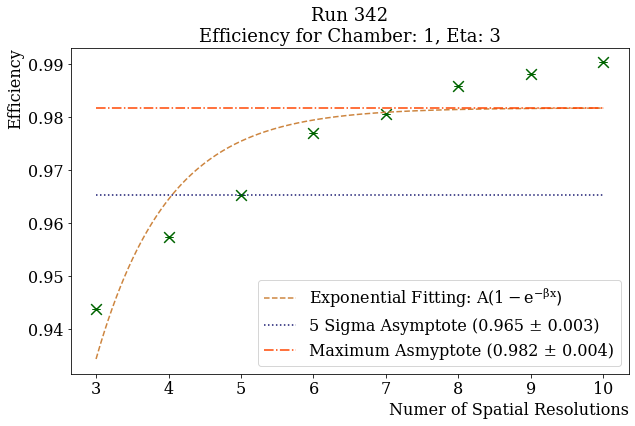

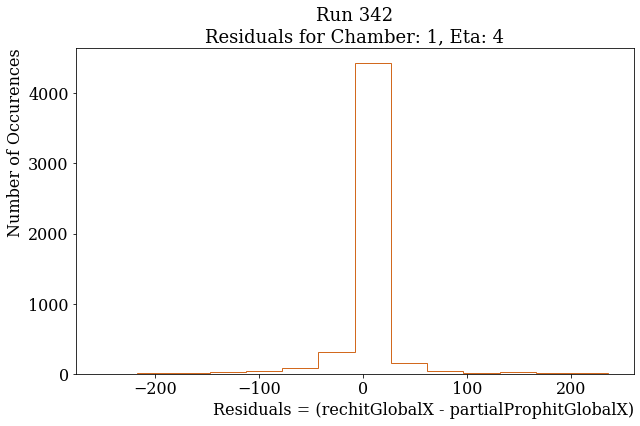

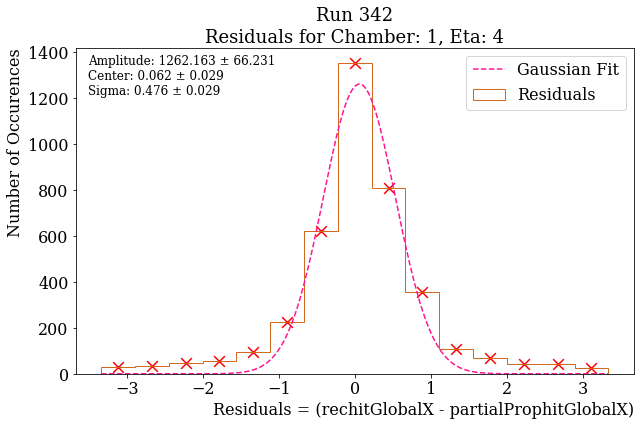

[0.9879954  0.91310668]


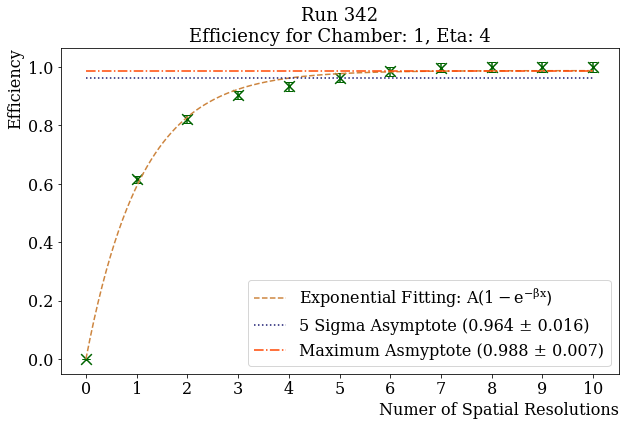

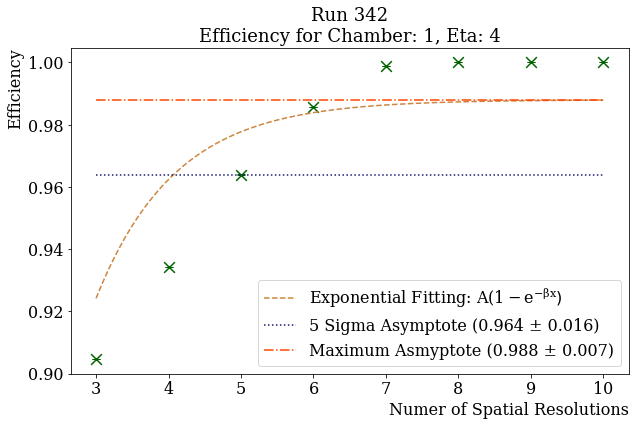

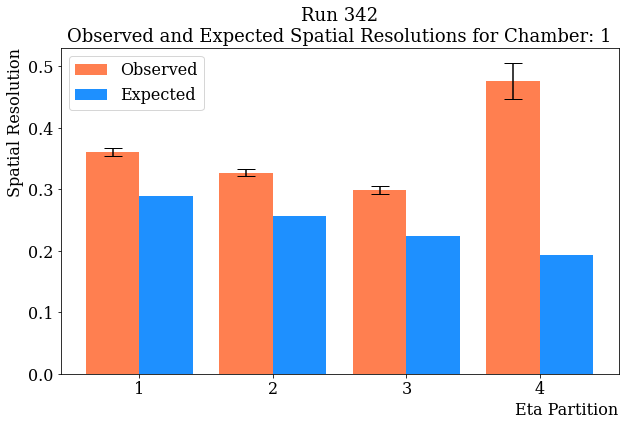

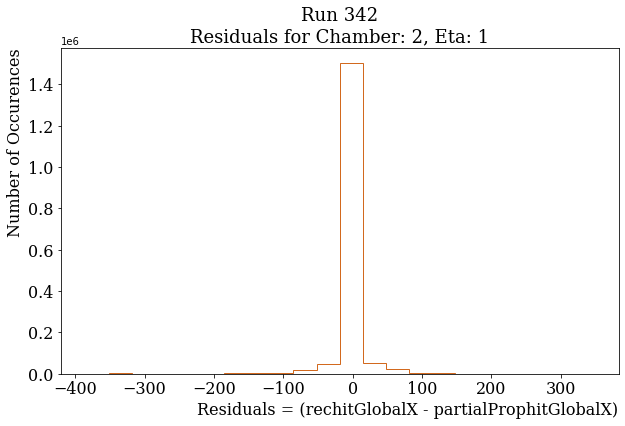

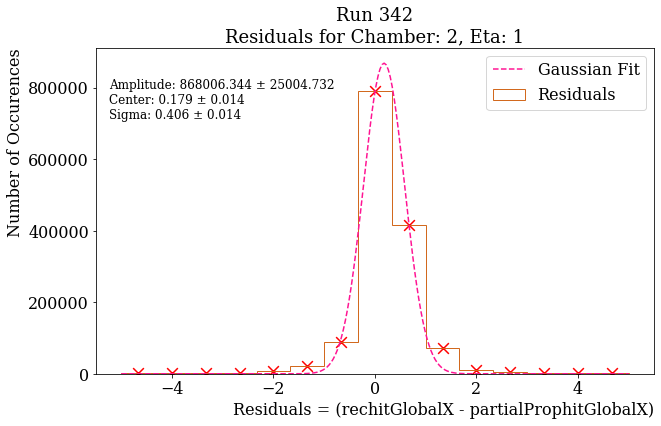

[0.99282295 0.90728693]


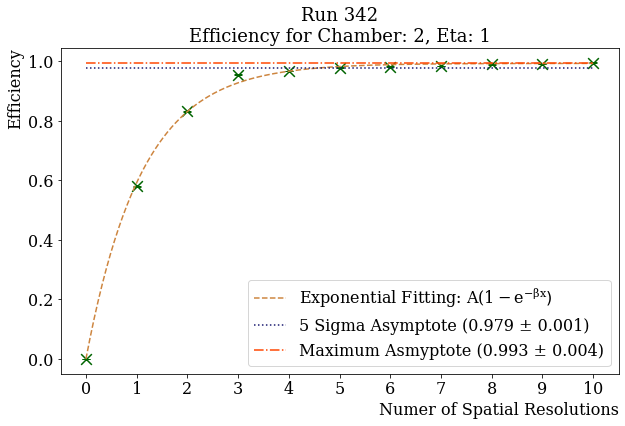

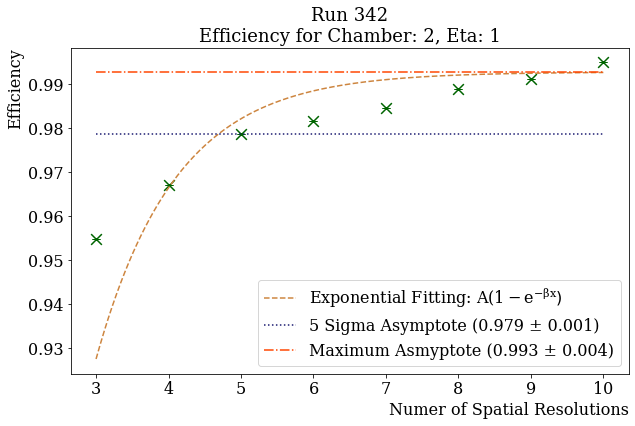

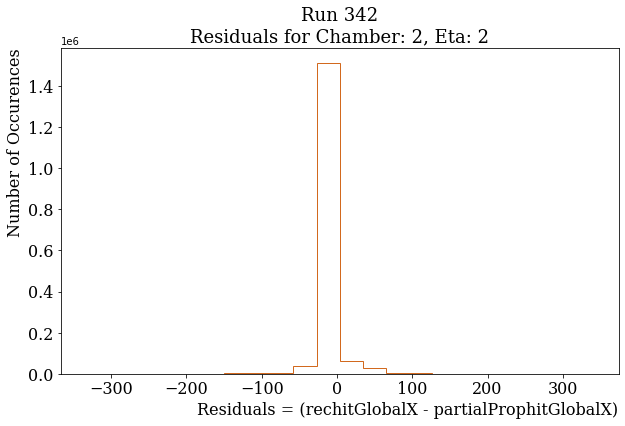

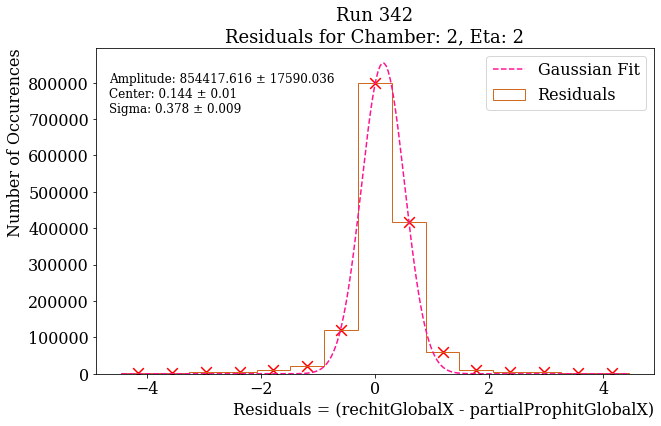

[0.9920965  0.94875222]


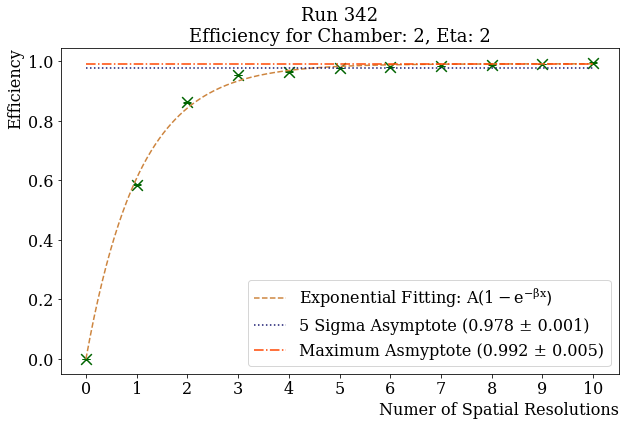

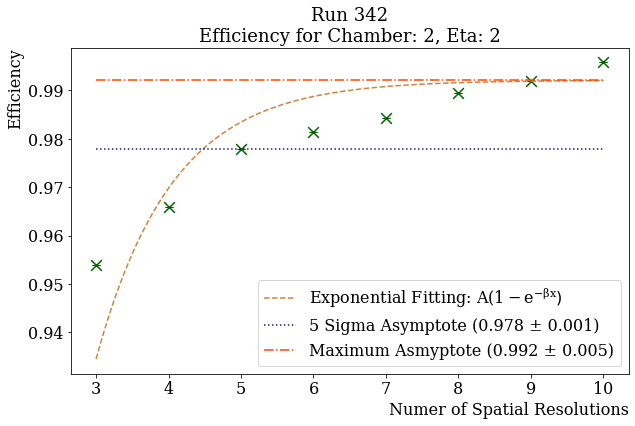

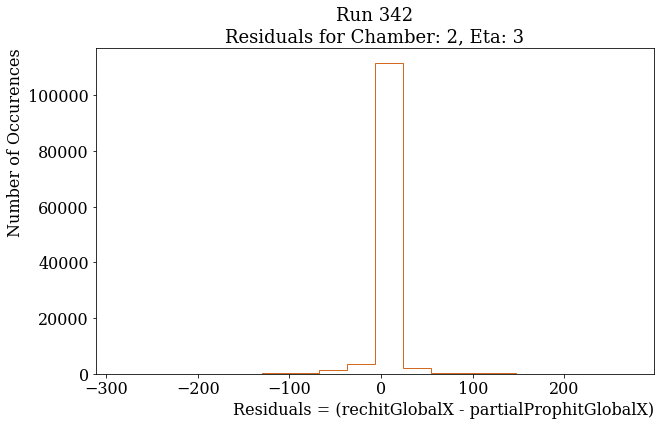

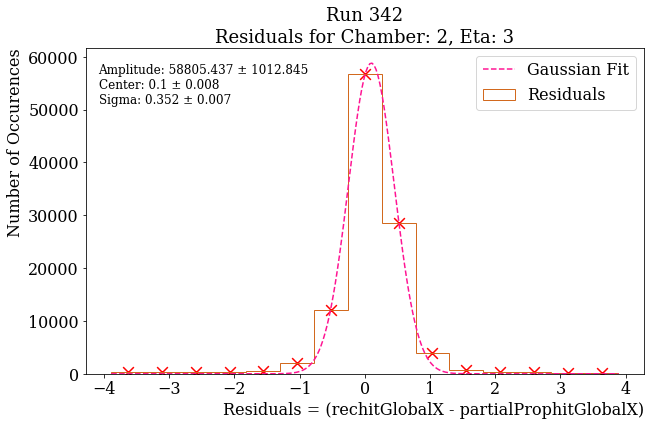

[0.99180126 1.00288602]


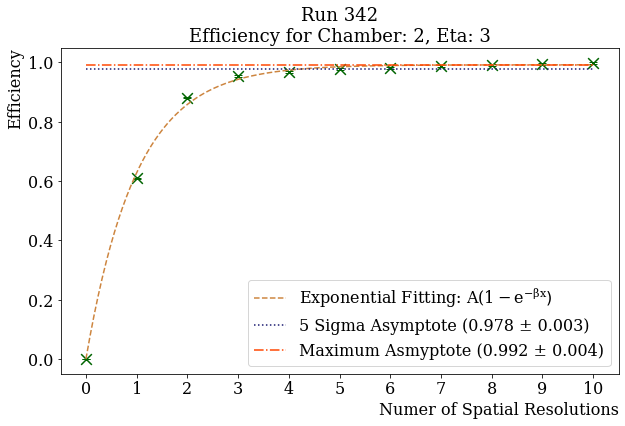

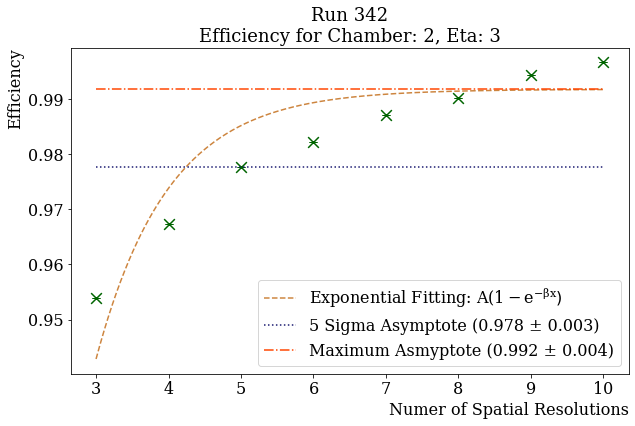

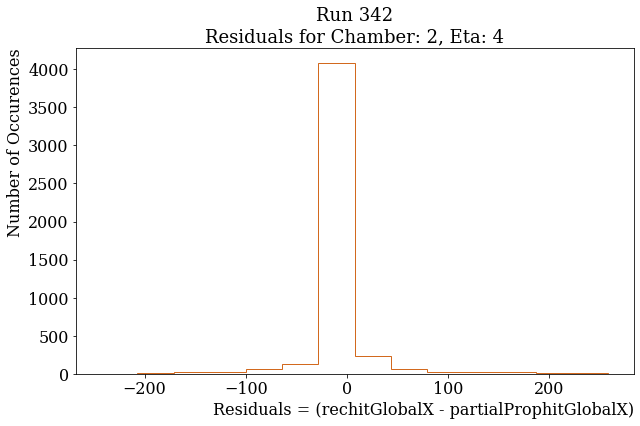

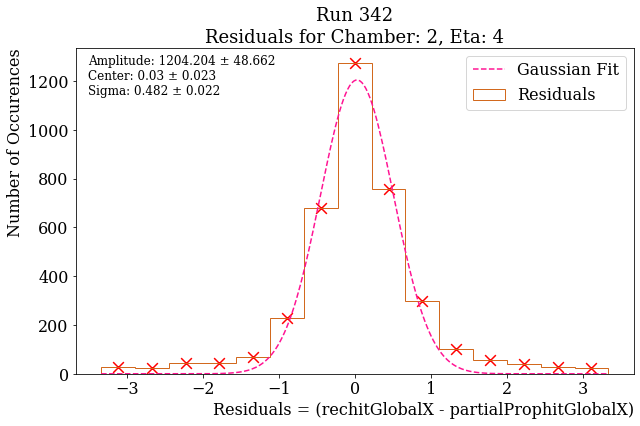

[0.98859379 0.98523577]


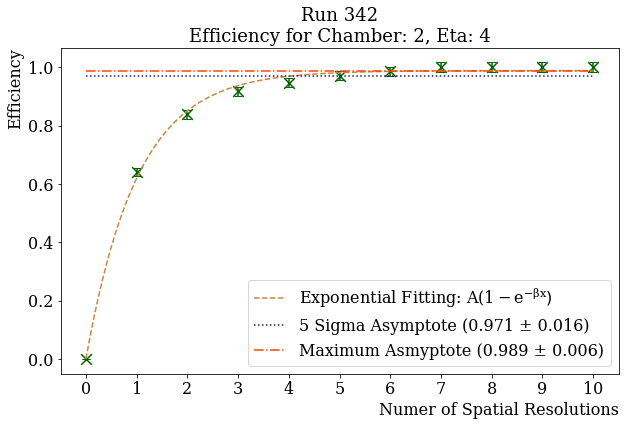

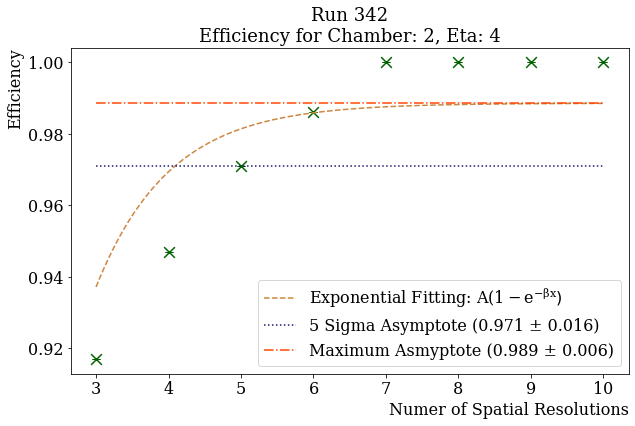

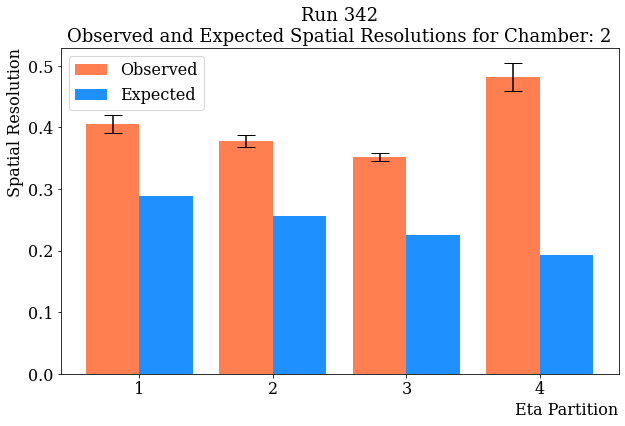

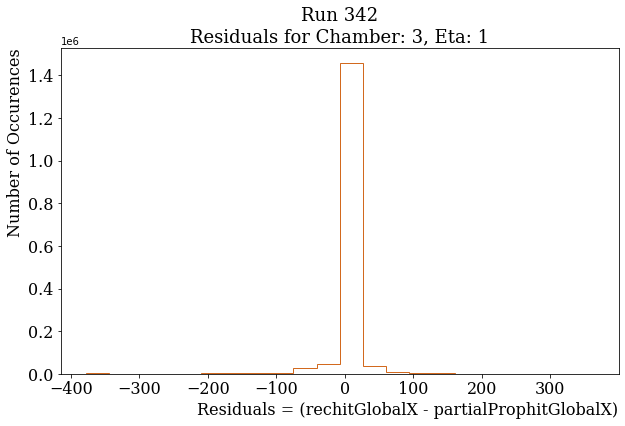

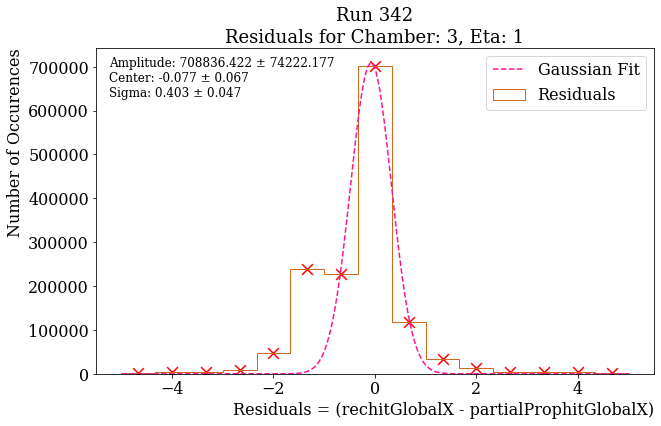

[1.         0.61730012]


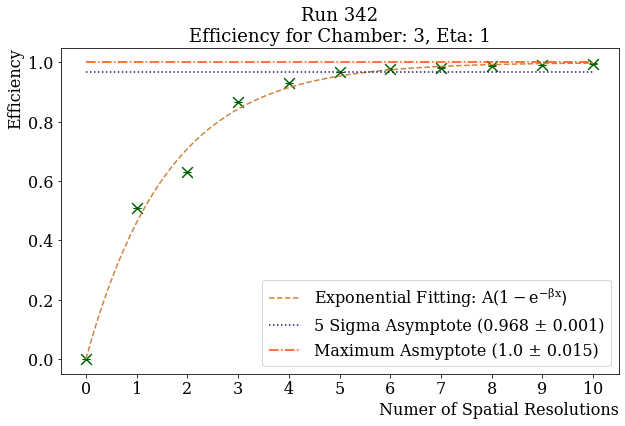

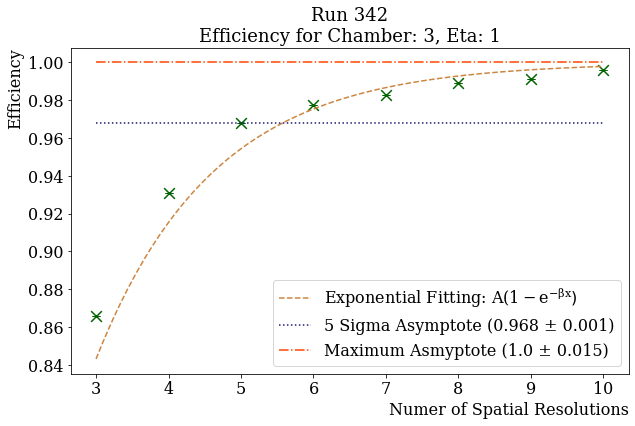

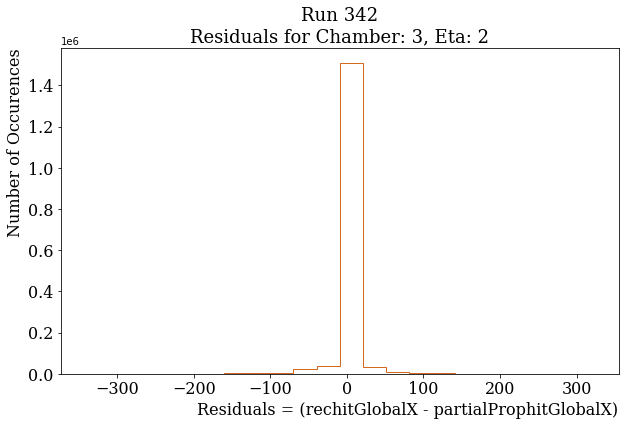

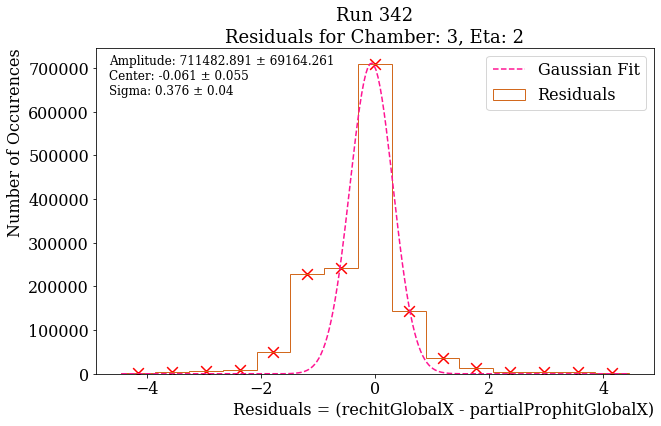

[1.         0.62449839]


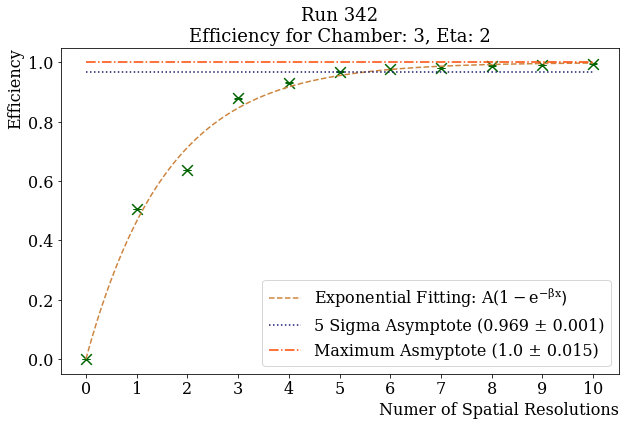

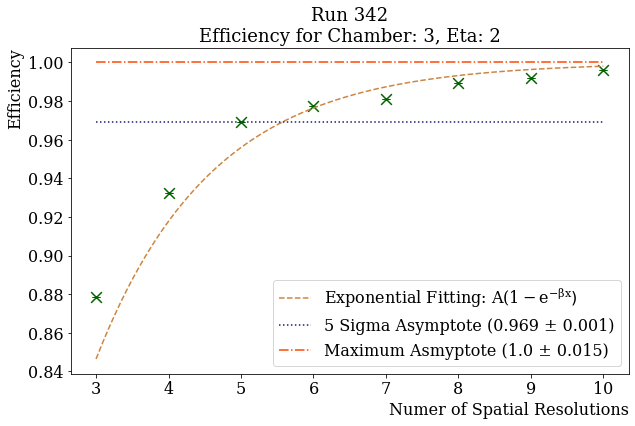

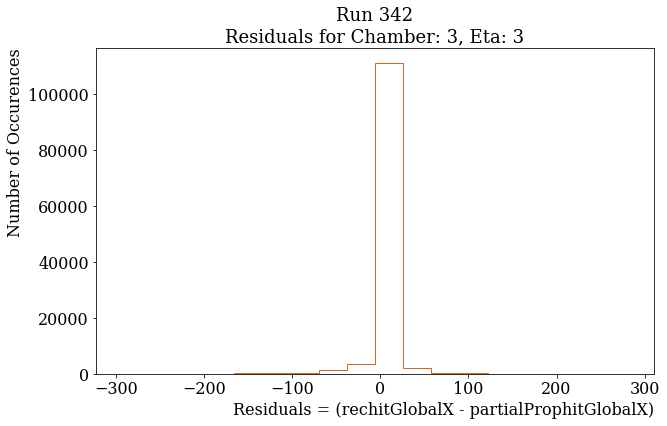

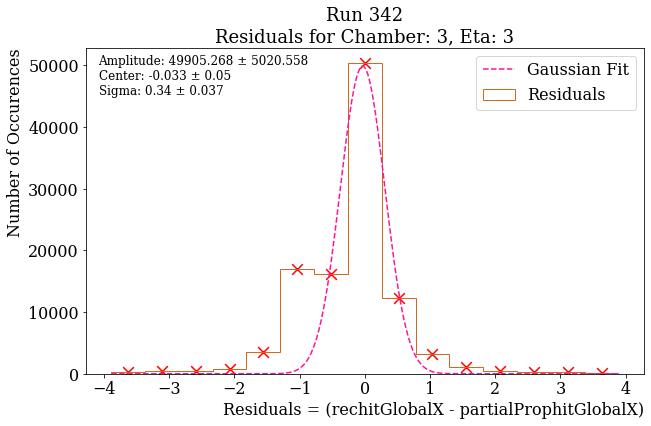

[1.         0.62196214]


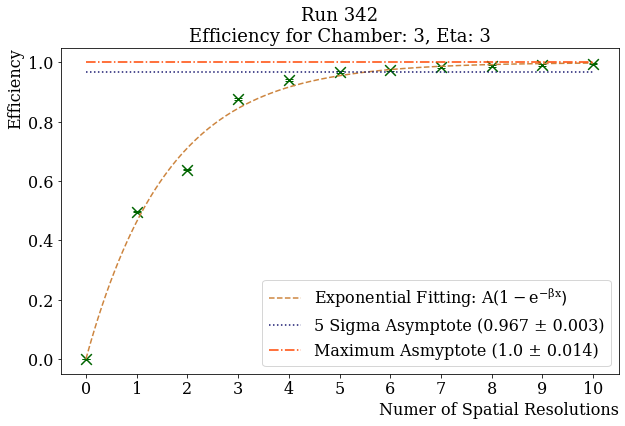

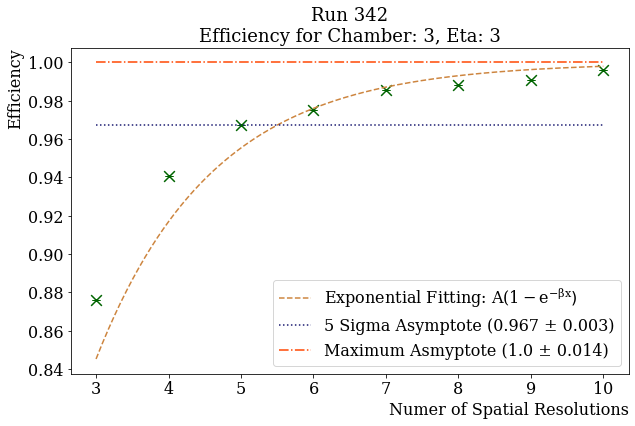

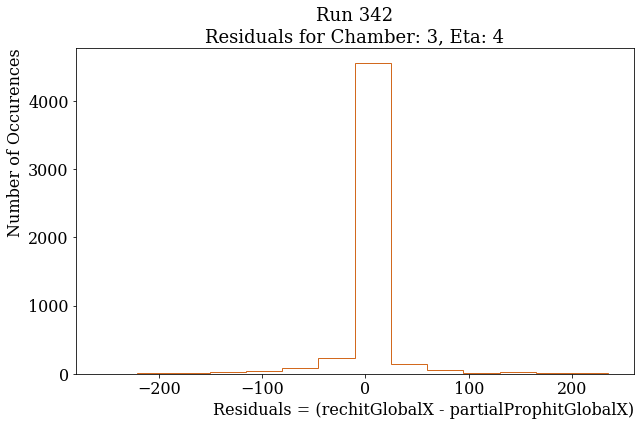

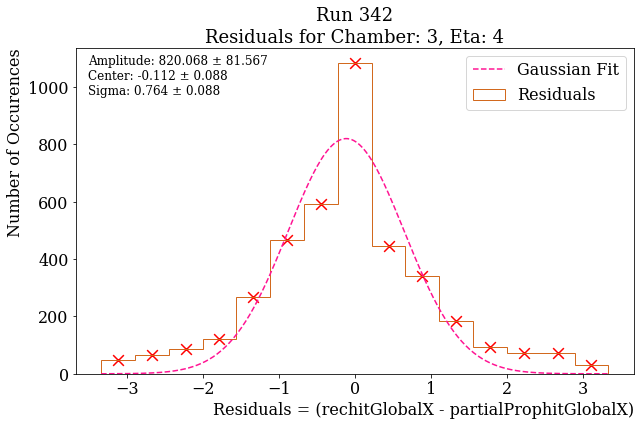

[0.99833118 1.03834011]


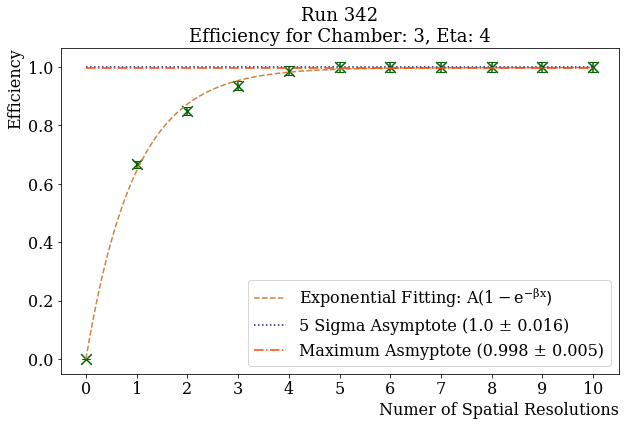

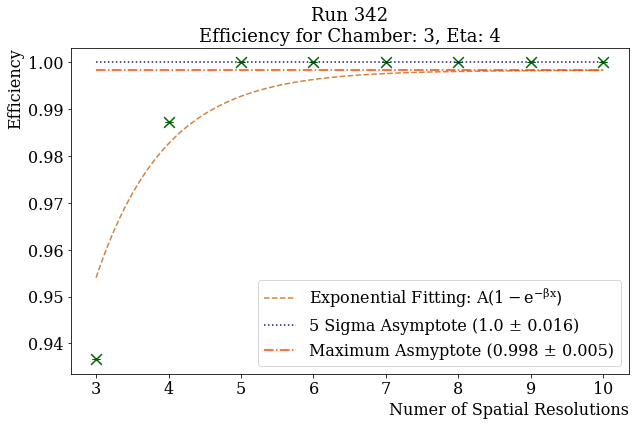

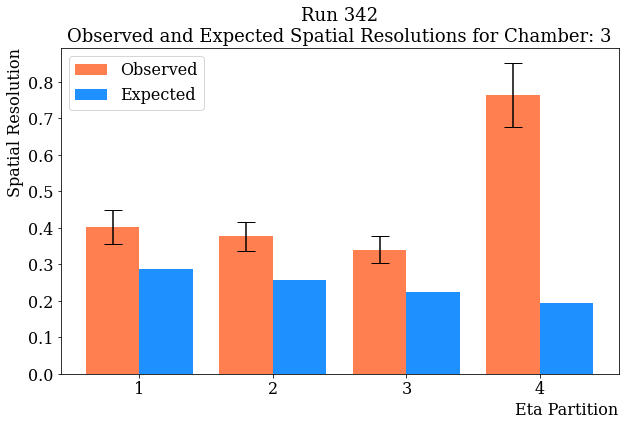

In [136]:
exp_res = {1:0.288506,2:0.256594,3:0.224682,4:0.19277}
pitches = {1:0.999414,2:0.888867,3:0.77832,4:0.667773}

for run in runs_all:
    
    t = uproot.open("/eos/user/n/nkurth/00000"+str(run)+".root")['trackTree']
    
    chamber_rechit = ak.Array(t["rechitChamber"].array())
    eta_rechit = ak.Array(t["rechitEta"].array())
    
    chamber_prop = ak.Array(t["partialTrackChamber"].array())
    eta_prop = ak.Array(t["partialProphitEta"].array())
    
    for ch in [0,1,2,3]:
        
        res = {}
        res_error = {}
        
        for et in [1,2,3,4]:
            
            cut1 = chamber_rechit==ch
            cut2 = eta_rechit==et
            cut_sum = np.logical_and(cut1, cut2)
            
            rechit = ak.Array(t['rechitGlobalX'].array())[cut_sum]
                        
            cut1 = chamber_prop==ch
            cut2 = eta_prop==et
            cut_sum = np.logical_and(cut1,cut2)
            prop_data = ak.Array(t['partialProphitGlobalX'].array())[cut_sum]
                        
            data = ak.cartesian([prop_data, rechit])
            data = ak.unzip(data)
            residuals = np.subtract( ak.flatten( data[1] ), ak.flatten( data[0] ) )
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            num = int(sturge(residuals))
            plt.hist(residuals, bins = num, histtype = 'step', color = 'chocolate')
            ax.set_title("Run "+str(run)+"\nResiduals for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)
            plt.xlabel("Residuals = (rechitGlobalX - partialProphitGlobalX)",loc = 'right',fontdict=font_axes)
            plt.ylabel("Number of Occurences",loc = 'top',fontdict=font_axes)
            plt.xticks(fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.savefig("Run_"+str(run)+"_Chamber_"+str(ch)+"_Eta_"+str(et)+"_Residuals_Full_hist.png")
            plt.show()
            plt.close()
            
            limit = pitches[et]*5
            
            residuals = residuals[np.abs(residuals)<=limit]
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            num = ((2*limit)/pitches[et])
            num = int(1.5*num)
            freq,bin_right,shit =plt.hist(residuals, bins = num, label = 'Residuals', histtype = 'step', range = [-limit,limit], color = 'chocolate')
            
            x = bin_right[0:len(bin_right)-1] + (limit)/num
            
            plt.scatter(x,freq,marker='x',color='red',s=115)
            
            guess = [max(freq),0,pitches[et]]
            conv = []
            i = 0
            while i < 5:
                para, cov = curve_fit(gauss,x,freq,p0=guess)
                guess = para
                conv = cov
                i+=1
            x_fit = np.linspace(-limit,limit,250)
            plt.plot(x_fit, gauss(x_fit, guess[0],guess[1],guess[2]), label = "Gaussian Fit", linestyle = '--', color = 'deeppink')
            plt.text(-pitches[et]*5.25, 0.9*max(freq), 'Amplitude: '+str(round(guess[0],3))+" \u00B1 "+str(round(np.sqrt(conv[0][0]),3))+'\nCenter: '+str(round(guess[1],3))+" \u00B1 "+str(round(np.sqrt(conv[1][1]),3))+'\nSigma: '+str(round(guess[2],3))+" \u00B1 "+str(round(np.sqrt(conv[2][2]),3)), fontdict={'family':'serif','color':'black','size':12})
            ax.set_title("Run "+str(run)+"\nResiduals for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)  
            plt.xlabel("Residuals = (rechitGlobalX - partialProphitGlobalX)",loc = 'right',fontdict=font_axes)
            plt.ylabel("Number of Occurences",loc = 'top',fontdict=font_axes)
            plt.legend(prop = {'family':'serif','size':16})
            plt.xticks(fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.savefig("Run_"+str(run)+"_Chamber_"+str(ch)+"_Eta_"+str(et)+"_Residuals_Gauss_hist.png")
            plt.show()
            plt.close()
            
            res[et]=guess[2]
            res_error[et] = np.sqrt(conv[2][2])
            
            i = 0
            eff = {}
            eff_err = {}
            size = len(residuals)
            while i < 10+1:
                val = residuals[np.absolute(residuals) < (i*guess[2])]
                val = len(val)
                eff[i]= val / size
                eff_err[i] = np.sqrt(val) / size
                i+=1
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            x_eff = np.array(list(eff.keys()),dtype=float)
            y_eff = np.array(list(eff.values()),dtype=float)
            y_err = np.array(list(eff_err.values()),dtype=float)

            plt.errorbar(x_eff,y_eff,yerr=y_err,linestyle='',capsize=4,ecolor='darkgreen')
            plt.scatter(x_eff,y_eff,marker='x',color='darkgreen',s=115)
            
            x_fit = np.linspace(min(x_eff),max(x_eff),250)
            
            i = 0
            guess = [1,1]
            conv = []
            while i < 5:
                para, cov = curve_fit(exp_2, x_eff, y_eff, p0=guess,bounds=((0,0),(1,np.inf)))
                guess = para
                conv = cov
                i+= 1
            plt.plot(x_fit,exp_2(x_fit,guess[0],guess[1]),linestyle='--',color='peru', label = "Exponential Fitting: $\mathregular{A(1-e^{-\u03B2x}})$")
            print(guess)    
            
            plt.plot(x_fit, horiz_asy(x_fit, eff[5]),linestyle=':',color='midnightblue',label = "5 Sigma Asymptote ("+str(round(eff[5],3))+" \u00B1 "+str(round(y_err[5],3))+")")
            plt.plot(x_fit, horiz_asy(x_fit, guess[0]),linestyle='-.',color='orangered', label = "Maximum Asmyptote ("+str(round(guess[0],3))+" \u00B1 "+str(round(np.sqrt(conv[0][0]),3))+")")
            ax.set_title("Run "+str(run)+"\nEfficiency for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)  
            plt.xlabel("Numer of Spatial Resolutions",loc = 'right',fontdict=font_axes)
            plt.ylabel("Efficiency",loc = 'top',fontdict=font_axes)
            plt.xticks(x_eff,np.array(x_eff,dtype=int),fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.legend(prop = {'family':'serif','size':16})
            plt.savefig("Run_"+str(run)+"_Chamber_"+str(ch)+"_Eta_"+str(et)+"_Efficiency_Full.png")
            plt.show()
            plt.close()
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            x_eff = x_eff[3:len(x_eff)]
            y_eff = y_eff[3:len(y_eff)]
            x_fit = np.linspace(min(x_eff),max(x_eff),250)
            scatter_y_err = np.divide(np.subtract( np.ones(len(x_eff)), y_eff ),size ) 
            plt.errorbar(x_eff,y_eff,yerr=scatter_y_err,linestyle='',capsize=4,ecolor='darkgreen')
            plt.scatter(x_eff,y_eff,marker='x',color='darkgreen',s=115)
            plt.plot(x_fit,exp_2(x_fit,guess[0],guess[1]),linestyle='--',color='peru', label = "Exponential Fitting: $\mathregular{A(1-e^{-\u03B2x}})$")
            plt.plot(x_fit, horiz_asy(x_fit, eff[5]),linestyle=':',color='midnightblue',label = "5 Sigma Asymptote ("+str(round(eff[5],3))+" \u00B1 "+str(round(y_err[5],3))+")")
            plt.plot(x_fit, horiz_asy(x_fit, guess[0]),linestyle='-.',color='orangered', label = "Maximum Asmyptote ("+str(round(guess[0],3))+" \u00B1 "+str(round(np.sqrt(conv[0][0]),3))+")")
            ax.set_title("Run "+str(run)+"\nEfficiency for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)  
            plt.xlabel("Numer of Spatial Resolutions",loc = 'right',fontdict=font_axes)
            plt.ylabel("Efficiency",loc = 'top',fontdict=font_axes)
            plt.xticks(x_eff,np.array(x_eff,dtype=int),fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.legend(prop = {'family':'serif','size':16})
            plt.savefig("Run_"+str(run)+"_Chamber_"+str(ch)+"_Eta_"+str(et)+"_Efficiency_Close.png")
            plt.show()
            plt.close()
    
        fig, ax = plt.subplots(1,1)
        fig.set_size_inches(10,6)
        plt.bar(np.array(list(res.keys()),dtype=float) - 0.2, np.absolute(np.array(list(res.values()),dtype=float)),0.4, yerr = np.array(list(res_error.values()),dtype=float), capsize=9 , color = 'coral')
        plt.bar(np.array(list(exp_res.keys()),dtype=float) + 0.2, np.array(list(exp_res.values()),dtype=float), 0.4, color = 'dodgerblue') 
        plt.xticks(np.array(list(res.keys()),dtype=float), list(res.keys()),fontname = 'serif', fontsize = 16)
        plt.yticks(fontname = 'serif', fontsize = 16)
        ax.set_title("Run "+str(run)+"\nObserved and Expected Spatial Resolutions for Chamber: " + str(ch),fontdict=font_title)  
        plt.legend(['Observed','Expected'], prop = {'family':'serif','size':16}, loc = 'upper left')
        plt.xlabel("Eta Partition",loc = 'right',fontdict=font_axes)
        plt.ylabel("Spatial Resolution",loc = 'top',fontdict=font_axes)
        plt.savefig("Run_"+str(run)+"_Chamber_"+str(ch)+"_Spatial_Res_Compar.png")
        plt.show()
        plt.close()

In [17]:
phi_r = t['rechitPhi'].array()
phi_r

<Array [[-0.0583, -0.0583, ... -0.0322]] type='3304141 * var * float64'>

In [121]:
np.sqrt(len(val)) / size

0.015323083915482257

In [18]:
phi_p=t['partialProphitPhi'].array()
phi_p

<Array [[-0.0583, -0.0583, ... [-0.0963]] type='3304141 * var * float64'>

In [27]:
print(phi_r[3304140])

[0.0195, 0.0218, 0.13, -0.0963, -0.106, ... 0.0075, -0.0165, 0.0397, -0.0322]


In [29]:
print(phi_p[3304140][0])

-0.09633200353103508


In [31]:
i = 0
for ind in phi_r[3304140]:
    if ind == phi_p[3304140][0]:
        print(True)
        print(i)
        break
    i+=1

/tmp/ipykernel_1218/2500319697.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,z,shading='auto')


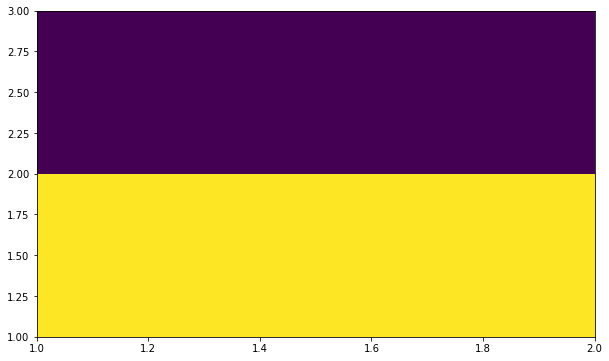

In [76]:
x = [1,2]
y = [1,2,3]
z = [[0.99,0.85],[0.987,1]]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,6)
plt.pcolor(x,y,z,shading='auto')

[[-0.0583], [], [], [], [], [], [], ... [-0.0655], [-0.08], [0.0753], [0.0715], []]
0.14830856189607633


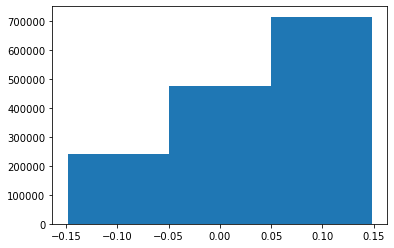

[[], [-0.09], [0.0187], [0.0543], [0.119], ... [], [], [], [], [], [], []]
0.14321122650040405


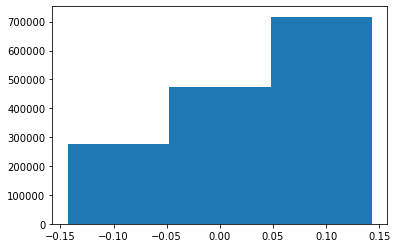

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
0.13759437445083395


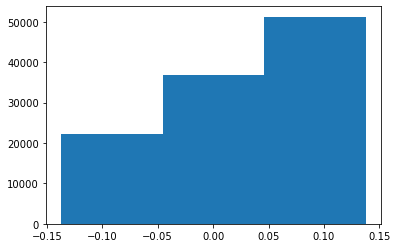

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
0.13118519859011932


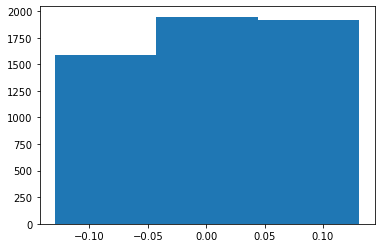

In [55]:
for run in runs_all:
    
    t = uproot.open("/eos/user/n/nkurth/00000"+str(run)+".root")['trackTree']
    chamber_prop = ak.Array(t["partialTrackChamber"].array())
    eta_prop = ak.Array(t["partialProphitEta"].array())
    
    for ch in [0]:
        
        res = {}
        res_error = {}
        
        for et in [1,2,3,4]:
            
            cut1 = chamber_prop==ch
            cut2 = eta_prop==et
            
            cut_sum = np.logical_and(cut1, cut2)
            
            phi = ak.Array(t['partialProphitPhi'].array())[cut_sum]
            
            print(phi)
            print(max(ak.flatten(phi)))
            plt.hist(ak.flatten(phi),bins=3)
            plt.show()
            plt.close()

In [47]:
t.keys()

['orbitNumber',
 'bunchCounter',
 'eventCounter',
 'rechitRawChannel',
 'rechitChamber',
 'rechitEta',
 'rechitLocalX',
 'rechitLocalY',
 'rechitR',
 'rechitPhi',
 'rechitErrorX',
 'rechitErrorY',
 'rechitGlobalX',
 'rechitGlobalY',
 'rechitErrorGlobalX',
 'rechitErrorGlobalY',
 'rechitClusterSize',
 'partialTrackChamber',
 'partialTrackChi2',
 'partialTrackCovarianceX',
 'partialTrackCovarianceY',
 'partialTrackSlopeX',
 'partialTrackSlopeY',
 'partialTrackInterceptX',
 'partialTrackInterceptY',
 'partialProphitEta',
 'partialProphitGlobalX',
 'partialProphitGlobalY',
 'partialProphitErrorX',
 'partialProphitErrorY',
 'partialProphitLocalX',
 'partialProphitLocalY',
 'partialProphitR',
 'partialProphitPhi',
 'trackChi2',
 'trackCovarianceX',
 'trackCovarianceY',
 'trackSlopeX',
 'trackSlopeY',
 'trackInterceptX',
 'trackInterceptY',
 'allChi2',
 'prophitChamber',
 'prophitEta',
 'prophitGlobalX',
 'prophitGlobalY',
 'prophitErrorX',
 'prophitErrorY',
 'prophitLocalX',
 'prophitLocalY'

In [107]:
t['rechitR'].array()

<Array [[1.29e+03, 1.29e+03, ... 1.19e+03]] type='3304141 * var * float64'>

[[-0.0583], [], [], [], [], [], ... [0.0753, 0.0218], [0.0715], [0.0218, -0.0761]]
0.14373848372420547
(array([ 303600., 1975710.,  905809.]), array([-0.14906963, -0.05146692,  0.04613578,  0.14373848]), <BarContainer object of 3 artists>)


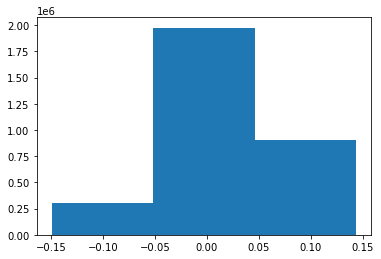

[[], [-0.0897], [0.0195], [0.0539], ... [], [], [0.0195, 0.13, -0.106, -0.0897]]
0.14219965954755326
(array([347573., 592417., 889352.]), array([-0.14293409, -0.04788951,  0.04715508,  0.14219966]), <BarContainer object of 3 artists>)


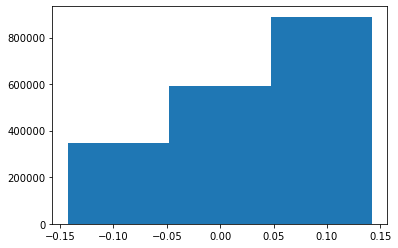

[[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [-0.0963]]
0.13587275774072985
(array([40584., 59856., 81220.]), array([-0.13657534, -0.04575931,  0.04505672,  0.13587276]), <BarContainer object of 3 artists>)


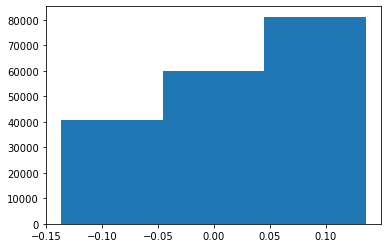

[[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
0.12827118128142928
(array([ 9093., 11221., 11232.]), array([-0.12893536, -0.04319985,  0.04253567,  0.12827118]), <BarContainer object of 3 artists>)


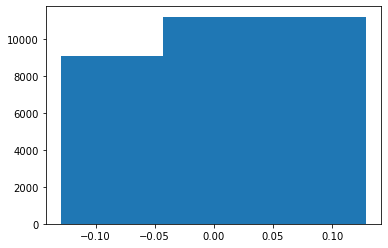

In [57]:
for run in runs_all:
    
    t = uproot.open("/eos/user/n/nkurth/00000"+str(run)+".root")['trackTree']
    chamber_prop = ak.Array(t["rechitChamber"].array())
    eta_prop = ak.Array(t["rechitEta"].array())
    
    for ch in [0]:
        
        res = {}
        res_error = {}
        
        for et in [1,2,3,4]:
            
            cut1 = chamber_prop==ch
            cut2 = eta_prop==et
            
            cut_sum = np.logical_and(cut1, cut2)
            
            phi = ak.Array(t['rechitPhi'].array())[cut_sum]
            
            print(phi)
            print(max(ak.flatten(phi)))
            g = plt.hist(ak.flatten(phi),bins=3)
            print(g)
            plt.show()
            plt.close()

In [108]:
exp_res = {1:0.288506,2:0.256594,3:0.224682,4:0.19277}
pitches = {1:0.999414,2:0.888867,3:0.77832,4:0.667773}

for run in runs_all:
    
    t = uproot.open("/eos/user/n/nkurth/00000"+str(run)+".root")['trackTree']
    
    chamber_rechit = ak.Array(t["rechitChamber"].array())
    eta_rechit = ak.Array(t["rechitEta"].array())
    
    chamber_prop = ak.Array(t["partialTrackChamber"].array())
    eta_prop = ak.Array(t["partialProphitEta"].array())
    
    matrix_vals= []
    matrix_errs= []
    
    rechit = ak.Array(t['rechitGlobalX'].array())
    prop_data = ak.Array(t['partialProphitGlobalX'].array())
    for ch in [3]:
        
        
        for et in [1,2,3,4]:
            
            temp = []
            temp1 = []           
            
            for phi in [[0,63], [63,127], [127,600]]:
                
                cut1 = chamber_rechit==ch
                cut2 = eta_rechit==et
                cut_sum = np.logical_and(cut1, cut2)
                                
                cut3 = np.abs(rechit)>phi[0]
                cut4 = np.abs(rechit)<=phi[1]
                cut_sum = np.logical_and(cut_sum, cut3)
                cut_sum = np.logical_and(cut_sum, cut4)
                
                r = rechit[cut_sum]

                cut1 = chamber_prop==ch
                cut2 = eta_prop==et
                cut_sum = np.logical_and(cut1,cut2) 
                
                cut3 = np.abs(prop_data)>phi[0]
                cut4 = np.abs(prop_data)<=phi[1]
                cut_sum = np.logical_and(cut_sum, cut3)
                cut_sum = np.logical_and(cut_sum, cut4)

                p = prop_data[cut_sum]       
                
                data = ak.cartesian([p, r])
                data = ak.unzip(data)
                residuals = np.subtract( ak.flatten( data[1] ), ak.flatten( data[0] ) )
            
                limit = pitches[et]*5
            
                residuals = residuals[np.abs(residuals)<=limit]

                num = ((2*limit)/pitches[et])
                num = int(num)
                freq,bin_right,shit =plt.hist(residuals, bins = num, label = 'Residuals', histtype = 'step', range = [-limit,limit], color = 'chocolate')
                plt.close()
            
                x = bin_right[0:len(bin_right)-1] + (limit)/num
                        
                guess = [max(freq),0,pitches[et]]
                conv = []
                i = 0
                while i < 5:
                    para, cov = curve_fit(gauss,x,freq,p0=guess)
                    guess = para
                    conv = cov
                    i+=1

                temp.append(guess[2])
                temp1.append(np.sqrt(conv[2][2]))
            
            matrix_vals.append(temp)
            matrix_errs.append(temp1)
    print(matrix_vals)

[[0.9016701167950664, 0.8966480377225718, 0.8912367277911044], [0.8105052669446958, 0.788223806540467, 0.7894492942228262], [0.7184983631748822, 0.7233470364715278, 0.7447919479137822], [0.8336370480978622, 0.8617176595162007, 0.9443995345497711]]


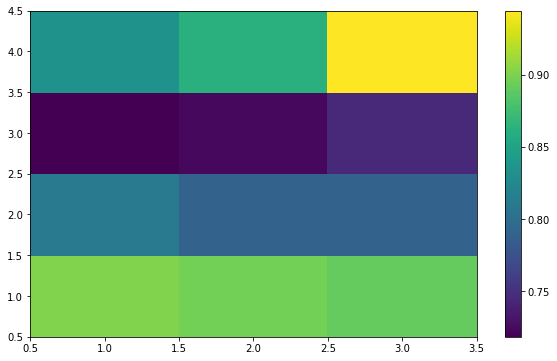

In [109]:
x = [1,2,3]
y = [1,2,3,4]
z = matrix_vals

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,6)
plt.pcolor(x,y,z,shading='auto')
plt.colorbar()

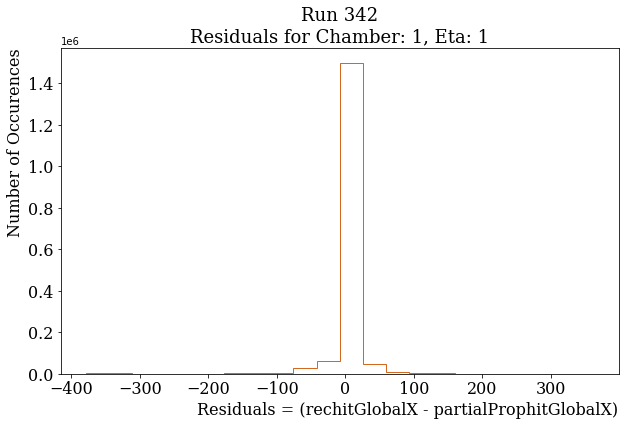

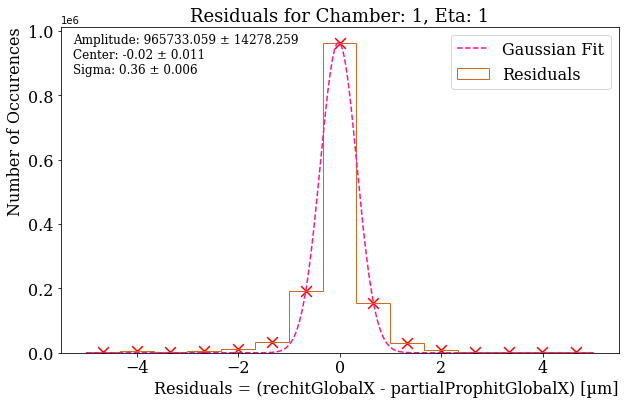

[0.97780148 1.10207896]


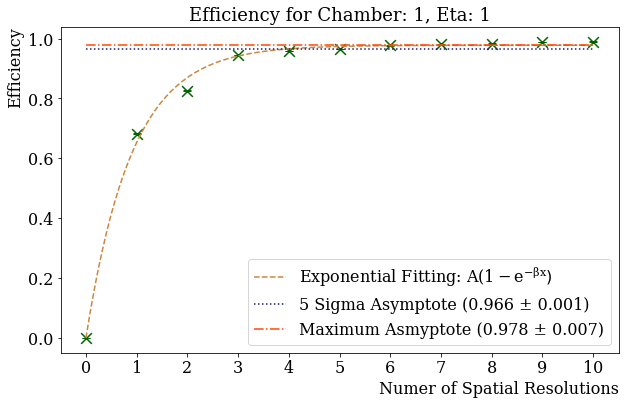

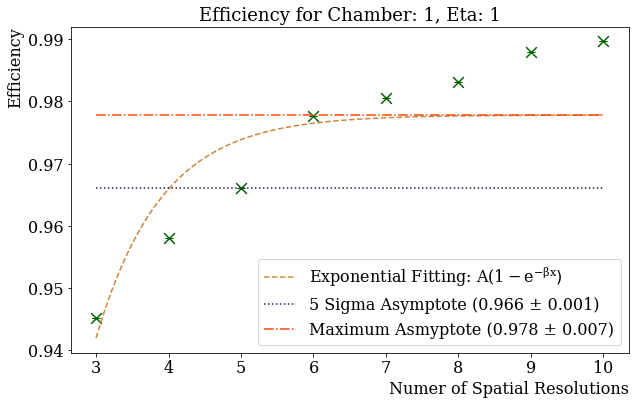

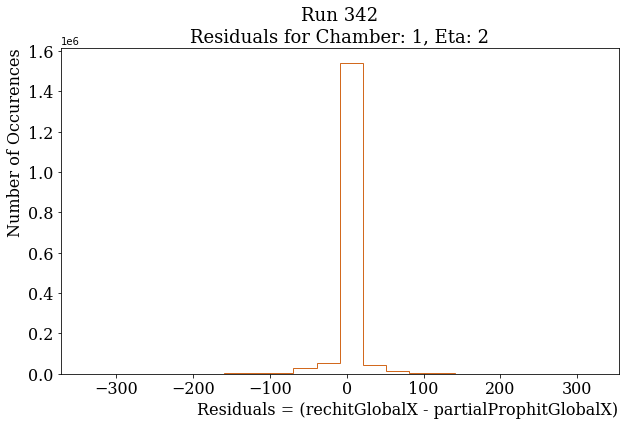

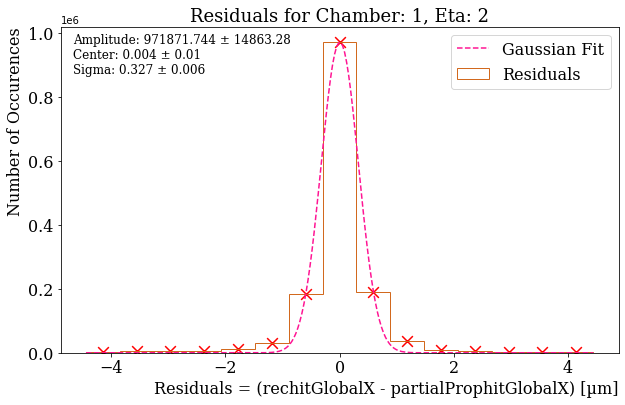

[0.97889903 1.08715484]


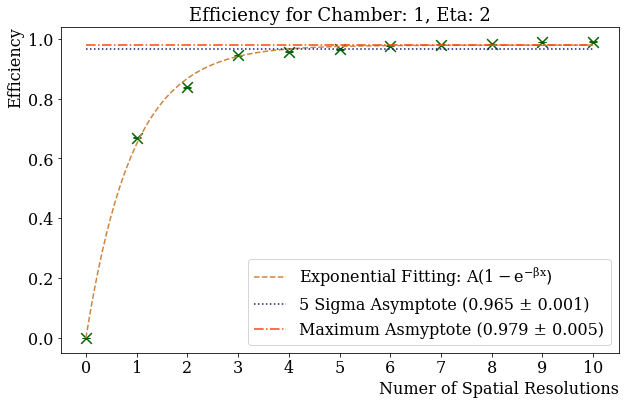

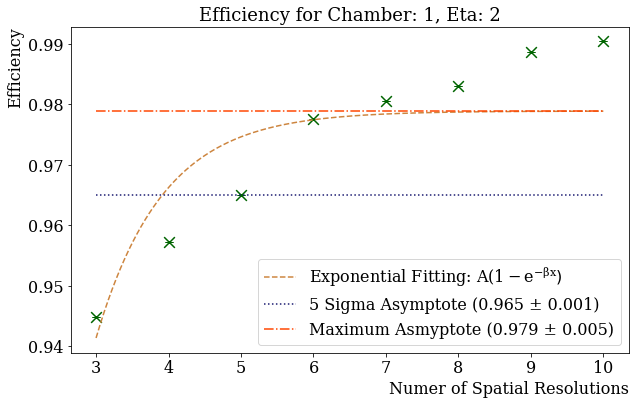

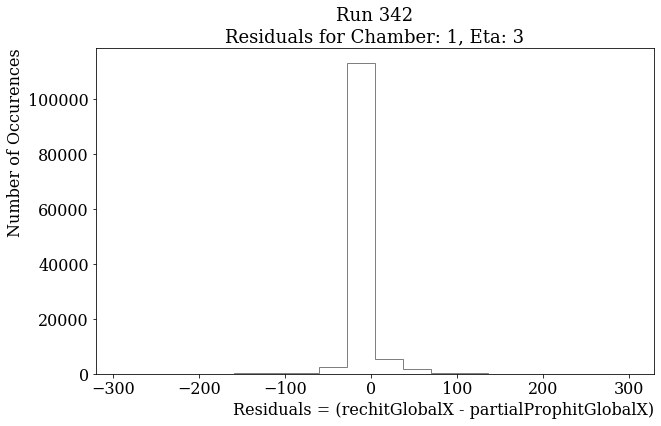

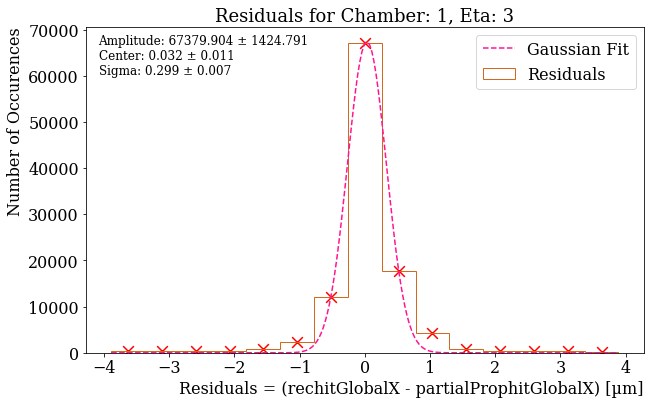

[0.98174108 1.01013346]


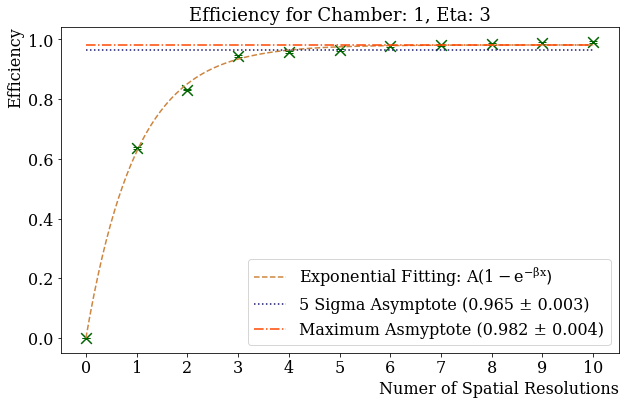

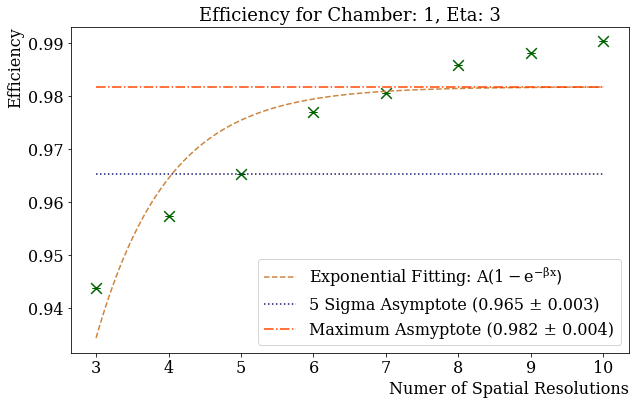

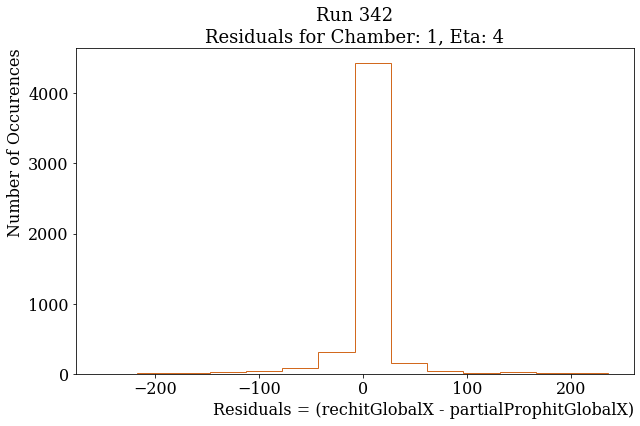

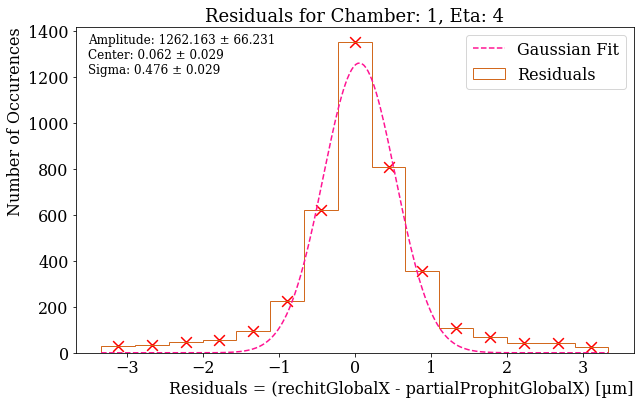

[0.9879954  0.91310668]


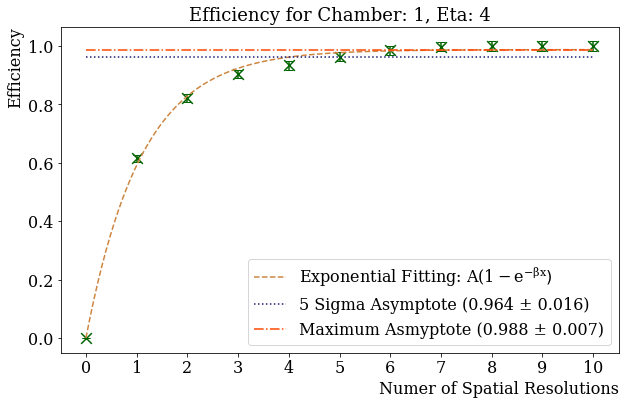

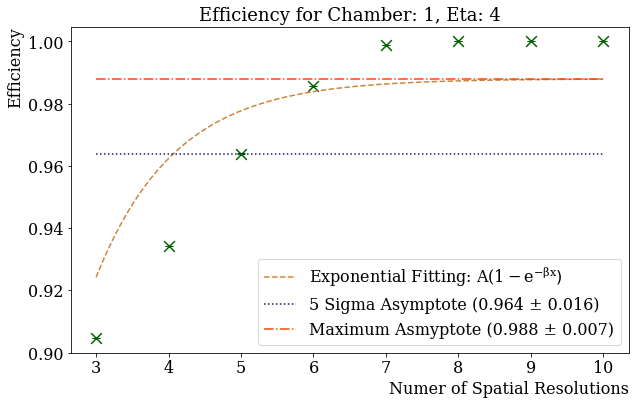

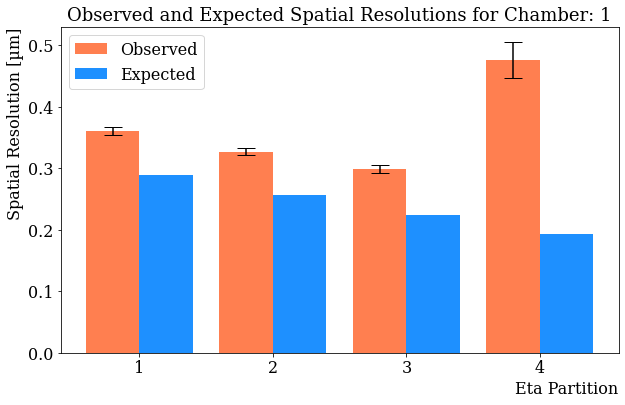

In [10]:
exp_res = {1:0.288506,2:0.256594,3:0.224682,4:0.19277}
pitches = {1:0.999414,2:0.888867,3:0.77832,4:0.667773}

runs_all = [342]
for run in runs_all:
    
    t = uproot.open("/eos/user/n/nkurth/00000"+str(run)+".root")['trackTree']
    
    chamber_rechit = ak.Array(t["rechitChamber"].array())
    eta_rechit = ak.Array(t["rechitEta"].array())
    
    chamber_prop = ak.Array(t["partialTrackChamber"].array())
    eta_prop = ak.Array(t["partialProphitEta"].array())
    
    for ch in [1]:
        
        res = {}
        res_error = {}
        
        for et in [1,2,3,4]:
            
            cut1 = chamber_rechit==ch
            cut2 = eta_rechit==et
            cut_sum = np.logical_and(cut1, cut2)
            
            rechit = ak.Array(t['rechitGlobalX'].array())[cut_sum]
                        
            cut1 = chamber_prop==ch
            cut2 = eta_prop==et
            cut_sum = np.logical_and(cut1,cut2)
            prop_data = ak.Array(t['partialProphitGlobalX'].array())[cut_sum]
                        
            data = ak.cartesian([prop_data, rechit])
            data = ak.unzip(data)
            residuals = np.subtract( ak.flatten( data[1] ), ak.flatten( data[0] ) )
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            num = int(sturge(residuals))
            plt.hist(residuals, bins = num, histtype = 'step', color = 'chocolate')
            ax.set_title("Run "+str(run)+"\nResiduals for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)
            plt.xlabel("Residuals = (rechitGlobalX - partialProphitGlobalX)",loc = 'right',fontdict=font_axes)
            plt.ylabel("Number of Occurences",loc = 'top',fontdict=font_axes)
            plt.xticks(fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.show()
            plt.close()
            
            limit = pitches[et]*5
            
            residuals = residuals[np.abs(residuals)<=limit]
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            num = ((2*limit)/pitches[et])
            num = int(1.5*num)
            freq,bin_right,shit =plt.hist(residuals, bins = num, label = 'Residuals', histtype = 'step', range = [-limit,limit], color = 'chocolate')
            
            x = bin_right[0:len(bin_right)-1] + (limit)/num
            
            plt.scatter(x,freq,marker='x',color='red',s=115)
            
            guess = [max(freq),0,pitches[et]]
            conv = []
            i = 0
            while i < 5:
                para, cov = curve_fit(gauss,x,freq,p0=guess)
                guess = para
                conv = cov
                i+=1
            x_fit = np.linspace(-limit,limit,250)
            plt.plot(x_fit, gauss(x_fit, guess[0],guess[1],guess[2]), label = "Gaussian Fit", linestyle = '--', color = 'deeppink')
            plt.text(-pitches[et]*5.25, 0.9*max(freq), 'Amplitude: '+str(round(guess[0],3))+" \u00B1 "+str(round(np.sqrt(conv[0][0]),3))+'\nCenter: '+str(round(guess[1],3))+" \u00B1 "+str(round(np.sqrt(conv[1][1]),3))+'\nSigma: '+str(round(guess[2],3))+" \u00B1 "+str(round(np.sqrt(conv[2][2]),3)), fontdict={'family':'serif','color':'black','size':12})
            ax.set_title("Residuals for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)  
            plt.xlabel("Residuals = (rechitGlobalX - partialProphitGlobalX) [\u00B5m]",loc = 'right',fontdict=font_axes)
            plt.ylabel("Number of Occurences",loc = 'top',fontdict=font_axes)
            plt.legend(prop = {'family':'serif','size':16})
            plt.xticks(fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.show()
            plt.close()
            
            res[et]=guess[2]
            res_error[et] = np.sqrt(conv[2][2])
            
            i = 0
            eff = {}
            eff_err = {}
            size = len(residuals)
            while i < 10+1:
                val = residuals[np.absolute(residuals) < (i*guess[2])]
                val = len(val)
                eff[i]= val / size
                eff_err[i] = np.sqrt(val) / size
                i+=1
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            x_eff = np.array(list(eff.keys()),dtype=float)
            y_eff = np.array(list(eff.values()),dtype=float)
            y_err = np.array(list(eff_err.values()),dtype=float)

            plt.errorbar(x_eff,y_eff,yerr=y_err,linestyle='',capsize=4,ecolor='darkgreen')
            plt.scatter(x_eff,y_eff,marker='x',color='darkgreen',s=115)
            
            x_fit = np.linspace(min(x_eff),max(x_eff),250)
            
            i = 0
            guess = [1,1]
            conv = []
            while i < 5:
                para, cov = curve_fit(exp_2, x_eff, y_eff, p0=guess,bounds=((0,0),(1,np.inf)))
                guess = para
                conv = cov
                i+= 1
            plt.plot(x_fit,exp_2(x_fit,guess[0],guess[1]),linestyle='--',color='peru', label = "Exponential Fitting: $\mathregular{A(1-e^{-\u03B2x}})$")
            print(guess)    
            
            plt.plot(x_fit, horiz_asy(x_fit, eff[5]),linestyle=':',color='midnightblue',label = "5 Sigma Asymptote ("+str(round(eff[5],3))+" \u00B1 "+str(round(y_err[5],3))+")")
            plt.plot(x_fit, horiz_asy(x_fit, guess[0]),linestyle='-.',color='orangered', label = "Maximum Asmyptote ("+str(round(guess[0],3))+" \u00B1 "+str(round(np.sqrt(conv[0][0]),3))+")")
            ax.set_title("Efficiency for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)  
            plt.xlabel("Numer of Spatial Resolutions",loc = 'right',fontdict=font_axes)
            plt.ylabel("Efficiency",loc = 'top',fontdict=font_axes)
            plt.xticks(x_eff,np.array(x_eff,dtype=int),fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.legend(prop = {'family':'serif','size':16})
            plt.show()
            plt.close()
            
            fig, ax = plt.subplots(1,1)
            fig.set_size_inches(10,6)
            x_eff = x_eff[3:len(x_eff)]
            y_eff = y_eff[3:len(y_eff)]
            x_fit = np.linspace(min(x_eff),max(x_eff),250)
            scatter_y_err = np.divide(np.subtract( np.ones(len(x_eff)), y_eff ),size ) 
            plt.errorbar(x_eff,y_eff,yerr=scatter_y_err,linestyle='',capsize=4,ecolor='darkgreen')
            plt.scatter(x_eff,y_eff,marker='x',color='darkgreen',s=115)
            plt.plot(x_fit,exp_2(x_fit,guess[0],guess[1]),linestyle='--',color='peru', label = "Exponential Fitting: $\mathregular{A(1-e^{-\u03B2x}})$")
            plt.plot(x_fit, horiz_asy(x_fit, eff[5]),linestyle=':',color='midnightblue',label = "5 Sigma Asymptote ("+str(round(eff[5],3))+" \u00B1 "+str(round(y_err[5],3))+")")
            plt.plot(x_fit, horiz_asy(x_fit, guess[0]),linestyle='-.',color='orangered', label = "Maximum Asmyptote ("+str(round(guess[0],3))+" \u00B1 "+str(round(np.sqrt(conv[0][0]),3))+")")
            ax.set_title("Efficiency for Chamber: " + str(ch) + ", Eta: " + str(et),fontdict=font_title)  
            plt.xlabel("Numer of Spatial Resolutions",loc = 'right',fontdict=font_axes)
            plt.ylabel("Efficiency",loc = 'top',fontdict=font_axes)
            plt.xticks(x_eff,np.array(x_eff,dtype=int),fontname = 'serif', fontsize = 16)
            plt.yticks(fontname = 'serif', fontsize = 16)
            plt.legend(prop = {'family':'serif','size':16})
            plt.show()
            plt.close()
    
        fig, ax = plt.subplots(1,1)
        fig.set_size_inches(10,6)
        plt.bar(np.array(list(res.keys()),dtype=float) - 0.2, np.absolute(np.array(list(res.values()),dtype=float)),0.4, yerr = np.array(list(res_error.values()),dtype=float), capsize=9 , color = 'coral')
        plt.bar(np.array(list(exp_res.keys()),dtype=float) + 0.2, np.array(list(exp_res.values()),dtype=float), 0.4, color = 'dodgerblue') 
        plt.xticks(np.array(list(res.keys()),dtype=float), list(res.keys()),fontname = 'serif', fontsize = 16)
        plt.yticks(fontname = 'serif', fontsize = 16)
        ax.set_title("Observed and Expected Spatial Resolutions for Chamber: " + str(ch),fontdict=font_title)  
        plt.legend(['Observed','Expected'], prop = {'family':'serif','size':16}, loc = 'upper left')
        plt.xlabel("Eta Partition",loc = 'right',fontdict=font_axes)
        plt.ylabel("Spatial Resolution [\u00B5m]",loc = 'top',fontdict=font_axes)
        plt.show()
        plt.close()